In [88]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing 
from sklearn.decomposition import PCA

import seaborn as sns

from IPython.display import display, HTML, Image
from IPython.display import SVG

# Neural network libraries
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.wrappers.scikit_learn import KerasClassifier

### Load the dataset and explore it 

In [89]:
dataset = pd.read_csv('summary2.csv')
display(dataset.head())

,Country,Region,208Pb/206Pb,206Pb/207Pb,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
0,Egypt,Timna,2.07167,1.065417,18.800,17.645680,38.947396
1,Eire,NaN,2.10380,1.094451,18.178,16.609239,38.242876
2,Eire,Galway,2.14261,1.117743,17.253,15.435569,36.966450
3,Egypt,Gabal El Ineigi,2.11090,1.139134,17.630,15.476672,37.215167
4,Italy,Sardinia,2.12330,1.141279,17.812,15.607053,37.820220


In [90]:
# Check for presence of missing values
print("Missing Values")
print(dataset.isnull().sum())

Missing Values
Country         0
Region         39
208Pb/206Pb     0
206Pb/207Pb     0
206Pb/204Pb    20
207Pb/204Pb    20
208Pb/204Pb    20
dtype: int64


In [91]:
# Get rid of rows having missing values (just 20 in 4363 samples)
dataset = dataset[np.isfinite(dataset['206Pb/204Pb'])]

# Re-index the dataset
dataset.index = range(4343)

# Check for presence of missing values again
print("Missing Values")
print(dataset.isnull().sum())

Missing Values
Country         0
Region         39
208Pb/206Pb     0
206Pb/207Pb     0
206Pb/204Pb     0
207Pb/204Pb     0
208Pb/204Pb     0
dtype: int64


In [92]:
# explore dataset more
a = dataset["Country"].value_counts()/dataset["Country"].value_counts().sum()
c = (100. * a).round(1).astype(str) + '%'
b = dataset["Country"].value_counts()
cum_sum = np.cumsum(100. * a).round(1).astype(str) + '%'

# Gathering dataframes created above into one 
d = pd.concat([b, c, cum_sum], axis = 1)
#d.columns = ['Count', 'Percentage', 'Cumulative P.']
# Displaying number of samples for each countries with percentages
display(d.head(15))


e = dataset["Region"].value_counts()/dataset["Region"].value_counts().sum()
f = (100. * e).round(1).astype(str) + '%'
g = dataset["Region"].value_counts()
cum_sum2 = np.cumsum(100. *e).round(1).astype(str) + '%'

# Gathering dataframes created above into one
h = pd.concat([g, f, cum_sum2], axis = 1)
#h.columns = ['Count', 'Percentage', 'Cumulative P.']
# Displaying number of samples for each regions with percentages
display(h.head(25))


# Note: merge join 
    # https://datacarpentry.org/python-socialsci/11-joins/index.html

,Country,Country,Country
Greece,1338,30.8%,30.8%
Italy,770,17.7%,48.5%
Spain,728,16.8%,65.3%
Cyprus,490,11.3%,76.6%
Turkey,361,8.3%,84.9%
England,261,6.0%,90.9%
Wales,146,3.4%,94.3%
Bulgaria,136,3.1%,97.4%
Eire,47,1.1%,98.5%
Egypt,31,0.7%,99.2%


,Region,Region,Region
Sardinia,468,10.9%,10.9%
Cyclades,304,7.1%,17.9%
Sierra Morena,185,4.3%,22.2%
Attica,142,3.3%,25.5%
Sud-Est,117,2.7%,28.3%
Province of Huelva,98,2.3%,30.5%
Larnaca,97,2.3%,32.8%
Province of Almeria,96,2.2%,35.0%
Province of Sevilla,80,1.9%,36.9%
Solea,63,1.5%,38.3%


In [93]:
# Show the number of countries and regions in the dataset 
print("Number of countries: ", len(pd.unique(dataset["Country"])))
print("Number of regions: ", len(pd.unique(dataset["Region"])))

Number of countries:  16
Number of regions:  453


In [94]:
# statistical summary of numerical columns
display(dataset.select_dtypes(include=[np.number]).describe())

,208Pb/206Pb,206Pb/207Pb,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb
count,4343.000000,4343.000000,4343.000000,4343.000000,4343.000000
mean,2.081481,1.185905,18.569244,15.658071,38.644838
std,0.022450,0.019472,0.332109,0.071317,0.357808
min,1.635600,1.065417,17.253000,14.995782,36.966450
25%,2.069040,1.168637,18.290000,15.628000,38.367965
50%,2.078450,1.191895,18.622000,15.658252,38.666448
75%,2.098257,1.198796,18.807000,15.689925,38.943319
max,2.142610,1.465846,23.690000,17.645680,41.061193


### Split the dataset into X and y using skicit-learn library

In [95]:
X = dataset.iloc[:, dataset.columns != 'Country', ]
X = X.iloc[:, X.columns != 'Region']
y = dataset["Country"]

# Saving X and y with different names if it is needed later to use 
X_full = X
y_full = y

### Look at the skewness of the data

In [96]:
# Log transform the data to see the difference regarding the skewness of the data
#    # http://onlinestatbook.com/2/transformations/log.html
X_log = np.log(X)
X_log_log = np.log(X_log)

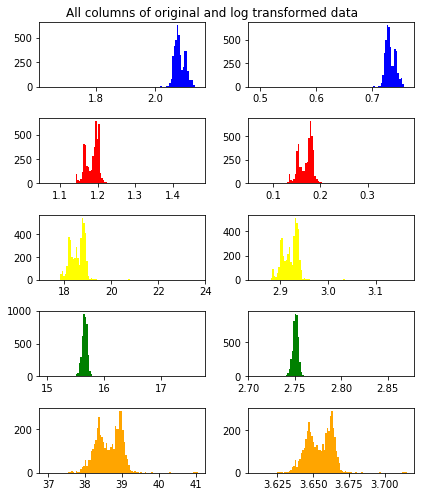

In [97]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# Adjusting figure size and creating color array to differentiate the graphs
plt.figure(figsize=(6, 7))
# colors = ['blue', 'red', 'yellow', 'green', 'orange', 'purple', 'pink', 'black', 'cyan', 'magenta']
colors = ['blue', 'blue', 'red', 'red', 'yellow', 'yellow', 'green', 'green', 'orange', 'orange']

# Plotting histograms of every column of original and log transformed data
# To see if the data is skewed or not and is there any need to use log-transformed data in next steps
for i in range(10):
    # Forming subplot scheme
    plt.subplot(5, 2, i+1)
    # First column of the graphs is formed by the columns of original data 
    if i%2 == 0:
        plt.hist(X[X.columns[int(np.floor(i/2))]], bins = 100, color=colors[i])
    # Second column of the graphs is formed by the columns of log-transformed data
    else:
        plt.hist(X_log[X_log.columns[int(np.floor(i/2))]], bins = 100, color=colors[i])

plt.tight_layout()
plt.suptitle('All columns of original and log transformed data')
plt.subplots_adjust(top=0.95)
plt.show()

As we have seen there is not much difference between two columns of histograms. 
It means that the data is not skewed and there is no need to log-transform it to use in the research.

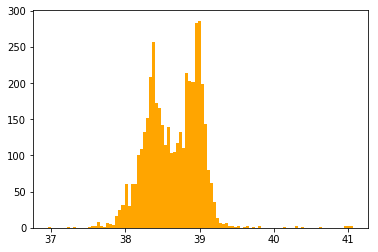

In [98]:
# Plotting the histogram of last (208Pb/204Pb) column of original data to highlight two hills
plt.hist(X.iloc[:,4], bins=100, color='orange')
plt.show()

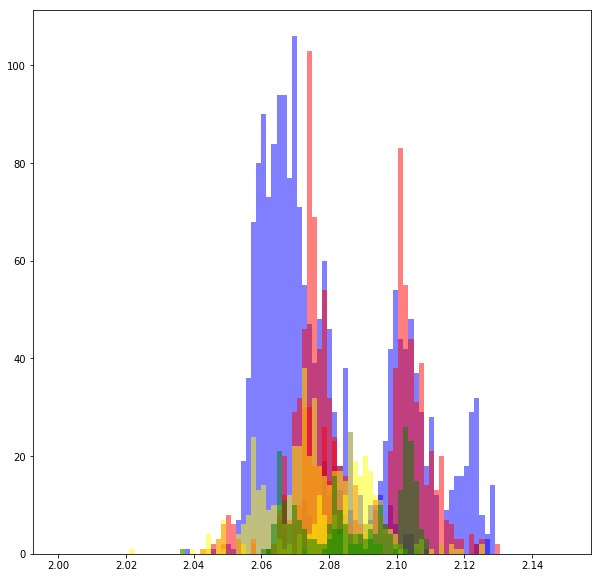

In [99]:
plt.figure(figsize=(10, 10))
# To show the 208Pb/206Pb samples of all 8 countries in one histogram.
# The aim is to have an idea about if there is huge difference between samples or not.
for i in range(8):
    filter = dataset.Country.isin(d.index.values[i:i+1])
    plt.hist(dataset[filter].iloc[:,2], bins = 100, range=[2, 2.15], alpha = 0.5, color=colors[i])
    
plt.show()

The values are not much different from each other, but significant difference is observed between some of them. 

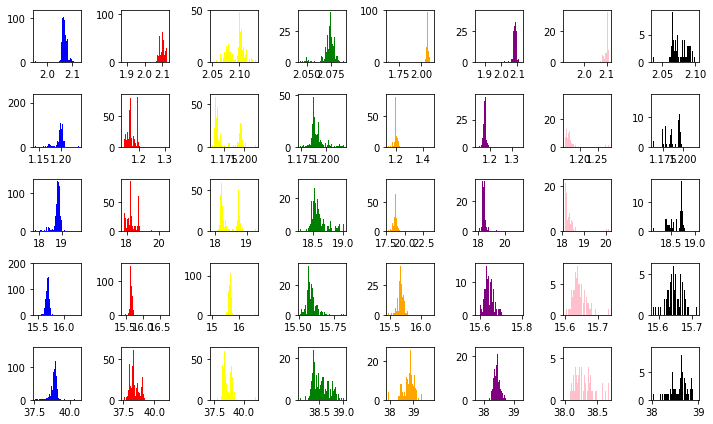

         Country Country Country
Greece      1338   30.8%   30.8%
Italy        770   17.7%   48.5%
Spain        728   16.8%   65.3%
Cyprus       490   11.3%   76.6%
Turkey       361    8.3%   84.9%
England      261    6.0%   90.9%
Wales        146    3.4%   94.3%
Bulgaria     136    3.1%   97.4%


In [100]:
# Examining the first column of data for only most sampled countries
# to see whether there is more than one hill on any histogram or not 
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'yellow', 'green', 'orange', 'purple', 'pink', 'black', 'cyan', 'magenta']

# Creating a chart including 8*5 histograms
for j in range (5):
    for i in range(8):
        filter = dataset.Country.isin(d.index.values[i:i+1])
        plt.subplot(5, 8, j*8+i+1)
        plt.hist(dataset[filter].iloc[:,2+j], bins = 100, color=colors[i])
        
plt.tight_layout()
plt.show()

# To display the number of samples for each country
print(d.Country.iloc[0:8,0:3])

Some of these countries has more than one hill. It means that there is high possibility for those countries having more than one type of artefact. 

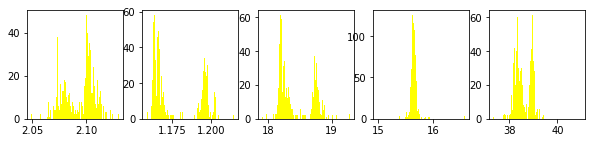

In [101]:
# Plotting the histogram of spain data columns to highlight hills
filter_spain = dataset.Country.isin(d.index.values[2:3])

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.hist(dataset[filter_spain].iloc[:,i+2], bins = 100, color = "yellow")
    
plt.show()

## Clustering the data using k-means algorithm

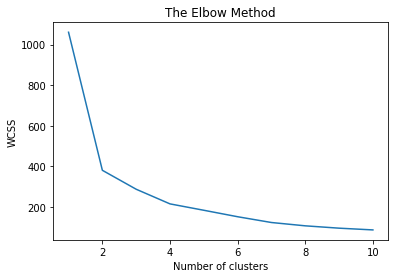

In [102]:
# Using the elbow method to find the optimal number of clusters
# Plotting Within-Cluster-Sum-of-Squares (WCSS) values for the number of clusters from 1 to 10
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we have seen the graph above, the breakpoint from the results of k-means algorithm may be chosen as 2.

In [103]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

# Storing results in an array
y_kmeans_all = kmeans.fit_predict(X)

# Changing type to a dataframe
y_kmeans_all_df = pd.DataFrame(y_kmeans_all)

# Creating a dataset with clusters and country information of samples
X_clusters = pd.concat([X, y_kmeans_all_df], axis = 1)
X_clusters_country = pd.concat([X_clusters, dataset.iloc[:,0]], axis = 1)
# X_clusters_country.head(5)

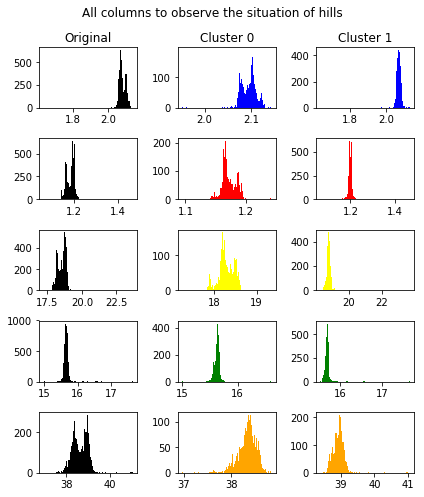

In [104]:
# Adjusting figure size
plt.figure(figsize=(6, 7))

# Displaying histograms for each column of original data, cluster 1 and cluster 2
# To see that breaking data into two is enough for getting rid of hills or not
for i in range(15):
    # Forming subplot scheme
    plt.subplot(5, 3, i+1)
    # First column of the graphs is formed by the columns of original data 
    if i%3 == 0:
        plt.hist(X[X.columns[int(np.floor(i/3))]], bins = 100, color='black')
        if i == 0:
            plt.title('Original')
    # Second column of the graphs is formed by the columns of log-transformed data
    elif i%3 == 1:
        plt.hist(X_clusters[X_clusters.iloc[:,5]==0].iloc[:,int(np.floor(i/3))], bins = 100, color=colors[int(np.floor(i/3))])
        if i ==1:
            plt.title('Cluster 0')
    else:
        plt.hist(X_clusters[X_clusters.iloc[:,5]==1].iloc[:,int(np.floor(i/3))], bins = 100, color=colors[int(np.floor(i/3))])
        if i ==2:
            plt.title('Cluster 1')
    
plt.tight_layout()
plt.suptitle('All columns to observe the situation of hills')
plt.subplots_adjust(top=0.9)
plt.show()

# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

As seen, even if splitting the data into two is not enough to get rid of hills in the dataset.

### Examining the dataset more by visualising via PCA

In [105]:
# Creating X and y for only most sampled 8 countries
filter = dataset.Country.isin(d.index.values[0:8])
X_filtered = dataset[filter].iloc[:,2:7]
y_filtered = dataset[filter].iloc[:,0]
dataset_filtered = pd.concat([X_filtered, y_filtered], axis=1)

# Creating a pca object
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_filtered)

# The percentage of explained variance after applying PCA
explained_variance = pca.explained_variance_ratio_
display(explained_variance)
print('Explained variance in total: '+(sum(explained_variance)*100).round(1).astype(str) + '%')

array([0.89992555, 0.0918639 ])

Explained variance in total: 99.2%


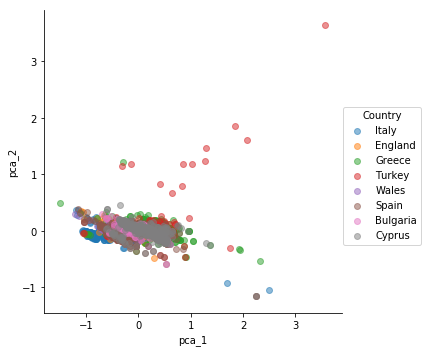

In [108]:
X_pca = pd.DataFrame(X_pca)
X_pca_country = pd.concat([y_filtered, X_pca], axis=1)
X_pca_country.columns = ['Country', 'pca_1', 'pca_2']

# Visualize samples in a scatter plot with different colors for each country
sns.lmplot( x="pca_1", y="pca_2", data=X_pca_country, fit_reg=False, hue='Country', scatter_kws={'alpha':0.5})

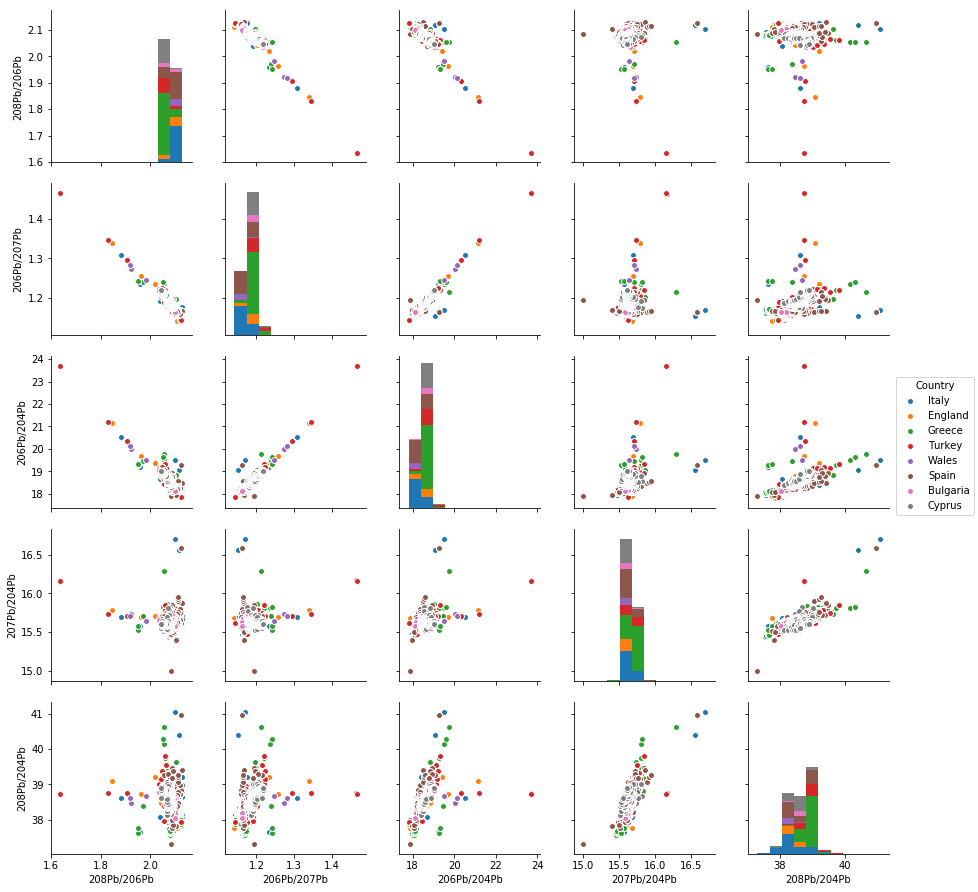

In [20]:
# Visualise samples with pairwise scatter plots
sns.pairplot(dataset_filtered, hue='Country')

## Applying Some Classification Algorithms

In [21]:
# Re-index the dataset
dataset_filtered.index = range(dataset_filtered.shape[0])

# Split the dataset into X and y for skicit-learn library
X = dataset_filtered.iloc[:, dataset_filtered.columns != 'Country', ]
y = dataset_filtered["Country"]

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.iloc[:,0:5] = sc.fit_transform(X.iloc[:,0:5])

C:\Users\aksunbul\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
# Splitting dataset for creating train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7)

# length of data sets
print("Size of train set: ",len(X_train))
print("Size of test set: ",len(X_test))

Size of train set:  2961
Size of test set:  1269


In [24]:
# Number of cross-validation applied in some of the models
cv_folds = 2

# Creating necessary dictionaries to save important results
model_test_accuracy_comparisons = dict()
model_F1_score_comparisons = dict()
model_tuned_params_list = dict()

### Train Decision Trees

In [25]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"], 'max_depth': list(range(3, 30, 3)) }  #, 'min_samples_split': [50]

# Perform the search
my_tuned_model_decisionTree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=10, verbose = 0, \
                            return_train_score=True)
my_tuned_model_decisionTree.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_model_decisionTree.best_params_)
display(my_tuned_model_decisionTree.best_score_)
# display(my_tuned_model_decisionTree.cv_results_)

Best parameters set found on development set:


{'criterion': 'entropy', 'max_depth': 24}

0.8135764944275583

### Test decision tree

In [26]:
# Make a set of predictions for the test data
y_pred = my_tuned_model_decisionTree.predict(X_test)
y_pred_dt = y_pred
# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
crosstab_dt = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
crosstab_dt

Accuracy: 0.8234830575256107
              precision    recall  f1-score   support

    Bulgaria       0.69      0.47      0.56        51
      Cyprus       0.90      0.83      0.86       146
     England       0.72      0.67      0.69        81
      Greece       0.87      0.87      0.87       389
       Italy       0.86      0.89      0.88       244
       Spain       0.85      0.93      0.89       202
      Turkey       0.69      0.75      0.72       110
       Wales       0.48      0.46      0.47        46

    accuracy                           0.82      1269
   macro avg       0.76      0.73      0.74      1269
weighted avg       0.82      0.82      0.82      1269

Confusion Matrix


Predicted,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales,All
True,,,,,,,,,
Bulgaria,24,6,4,6,2,1,4,4,51
Cyprus,2,121,3,8,4,2,6,0,146
England,1,2,54,2,8,4,1,9,81
Greece,7,5,3,338,7,3,22,4,389
Italy,0,1,3,9,217,6,5,3,244
Spain,0,0,0,3,9,187,0,3,202
Turkey,0,0,4,19,0,4,83,0,110
Wales,1,0,4,3,5,12,0,21,46
All,35,135,75,388,252,219,121,44,1269


In [27]:
# This cell is to save F1 score and accuracy rates using the charts above
line = metrics.classification_report(y_test, y_pred).split('\n')[-2]
result_data = line.split('      ')

model_F1_score_comparisons["Decision Tree"] = float(result_data[-2])
display(model_F1_score_comparisons)

model_test_accuracy_comparisons["Decision Tree"] = round(np.mean(my_tuned_model_decisionTree.best_score_),2)
display(model_test_accuracy_comparisons)

{'Decision Tree': 0.82}

{'Decision Tree': 0.81}

In [28]:
# Arr is to store pairs 
used_number_of_countries = 8
d.index.values[0:8].sort()

# This for loop is to create arr matrix
arr= []
total = 0
for i in range(8):
    for j in range(8):
        if i!=j:
            arr.append(d.index.values[0:8][i] + d.index.values[0:8][j])
            total = total+1
# arr

# With next for loop pair error rates for decision tree are calculated
b= pd.DataFrame.as_matrix(crosstab_dt)
c = b.flatten()

den = np.split(c, used_number_of_countries+1)[0:used_number_of_countries]
for i in range(used_number_of_countries):
    den[i] = np.delete(den[i], i)
    den[i] = den[i][0:used_number_of_countries-1]/den[i][-1]
# den

# Pair error rates for decision tree are saved with pair names on pair_errors matrix
pair_errors = pd.concat([pd.DataFrame(arr),round(pd.DataFrame(np.concatenate(den)),4)],axis =1)
pair_errors.columns = ['Pair', 'DT errors']
pair_errors.sort_values(by=['DT errors'], ascending=False)

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


,Pair,DT errors
54,WalesSpain,0.2609
45,TurkeyGreece,0.1727
0,BulgariaCyprus,0.1176
2,BulgariaGreece,0.1176
20,EnglandWales,0.1111
53,WalesItaly,0.1087
17,EnglandItaly,0.0988
51,WalesEngland,0.0870
1,BulgariaEngland,0.0784
5,BulgariaTurkey,0.0784


### Train Random Forest Models

In [29]:
# Set up the parameter grid to seaerch
param_grid = [
 {'n_estimators': list(range(100, 501, 50)), 'max_features': list(range(2, 5, 1)), 'min_samples_split': list(range(2, 20, 201)) }
]

# Perform the search
my_tuned_model_randomForest = GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model_randomForest.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model_randomForest.best_params_)
model_tuned_params_list["Tuned Random Forest"] = my_tuned_model_randomForest.best_params_
print(my_tuned_model_randomForest.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] max_features=2, min_samples_split=2, n_estimators=100 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=100, total=   0.6s
[CV] max_features=2, min_samples_split=2, n_estimators=100 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_features=2, min_samples_split=2, n_estimators=100, total=   0.5s
[CV] max_features=2, min_samples_split=2, n_estimators=150 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=150, total=   0.9s
[CV] max_features=2, min_samples_split=2, n_estimators=150 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=150, total=   0.7s
[CV] max_features=2, min_samples_split=2, n_estimators=200 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] max_features=2, min_samples_split=2, n_estimators=200 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=200, total=   1.1s
[CV] max_features=2, min_samples_split=2, n_estimators=250 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=250, total=   1.1s
[CV] max_features=2, min_samples_split=2, n_estimators=250 ...........
[CV]  max_features=2, min_samples_split=2, n_estimators=250, total=   1.3s
[CV] max_features=2, min_samples_split=2, n_estim

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.9min finished


Best parameters set found on development set:
{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 400}
0.8132387706855791


### Test Random Forest

In [30]:
# Make a set of predictions for the test data
y_pred = my_tuned_model_randomForest.predict(X_test)
y_pred_rf = y_pred
# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
crosstab_rf = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
crosstab_rf

              precision    recall  f1-score   support

    Bulgaria       0.76      0.57      0.65        51
      Cyprus       0.94      0.88      0.91       146
     England       0.73      0.74      0.74        81
      Greece       0.88      0.92      0.90       389
       Italy       0.88      0.92      0.90       244
       Spain       0.86      0.94      0.90       202
      Turkey       0.86      0.81      0.83       110
       Wales       0.73      0.41      0.53        46

    accuracy                           0.87      1269
   macro avg       0.83      0.77      0.79      1269
weighted avg       0.86      0.87      0.86      1269

Confusion Matrix


Predicted,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales,All
True,,,,,,,,,
Bulgaria,29,2,7,8,2,1,1,1,51
Cyprus,3,128,4,5,1,2,3,0,146
England,3,0,60,4,7,4,1,2,81
Greece,2,5,5,359,4,2,9,3,389
Italy,0,1,2,8,225,7,1,0,244
Spain,0,0,0,3,8,190,0,1,202
Turkey,0,0,2,17,0,2,89,0,110
Wales,1,0,2,3,9,12,0,19,46
All,38,136,82,407,256,220,104,26,1269


In [31]:
line = metrics.classification_report(y_test, y_pred).split('\n')[-2]
result_data = line.split('      ')

model_F1_score_comparisons["Random Forest"] = float(result_data[-2])
display(model_F1_score_comparisons)

model_test_accuracy_comparisons["Random Forest"] = round(np.mean(my_tuned_model_randomForest.best_score_),2)
display(model_test_accuracy_comparisons)

{'Decision Tree': 0.82, 'Random Forest': 0.86}

{'Decision Tree': 0.81, 'Random Forest': 0.81}

In [32]:
# With next for loop pair error rates for random forest are calculated
b = pd.DataFrame.as_matrix(crosstab_rf)
c = b.flatten()

den = np.split(c, used_number_of_countries+1)[0:used_number_of_countries]
for i in range(used_number_of_countries):
    den[i] = np.delete(den[i], i)
    den[i] = den[i][0:used_number_of_countries-1]/den[i][-1]
        
# Pair error rates for random forest are saved with pair names on pair_errors matrix
pair_errors = pd.concat([pair_errors,round(pd.DataFrame(np.concatenate(den)),4)],axis =1)
pair_errors = pair_errors.iloc[:,0:3]

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Train Bagging 

In [33]:
# Set up the parameter grid to seaerch
param_grid = [
 {'n_estimators': list(range(50, 501, 50)),
  'base_estimator': [tree.DecisionTreeClassifier(criterion="entropy"),tree.DecisionTreeClassifier(criterion="gini")]} # , max_depth = 6, min_samples_leaf = 200
]

# Perform the search
my_tuned_model_bagging = GridSearchCV(ensemble.BaggingClassifier(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model_bagging.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model_bagging.best_params_)
model_tuned_params_list["Tuned Bagging"] = my_tuned_model_bagging.best_params_
print(my_tuned_model_bagging.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=50 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=50, total=   1.1s
[CV] base_estimator=DecisionTree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=50, total=   1.6s
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=100 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_dept

[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=300, total=   7.5s
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=350 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_dep

[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=50, total=   0.7s
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=100 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 

[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=300, total=   2.8s
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=350 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.1min finished


Best parameters set found on development set:
{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 'n_estimators': 100}
0.8058088483620398


###  Test Bagging

In [34]:
# Make a set of predictions for the test data
y_pred = my_tuned_model_bagging.predict(X_test)
y_pred_bag = y_pred
# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
crosstab_bag = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
crosstab_bag

              precision    recall  f1-score   support

    Bulgaria       0.74      0.57      0.64        51
      Cyprus       0.93      0.86      0.89       146
     England       0.73      0.70      0.72        81
      Greece       0.88      0.92      0.90       389
       Italy       0.87      0.91      0.89       244
       Spain       0.86      0.95      0.90       202
      Turkey       0.82      0.81      0.81       110
       Wales       0.72      0.39      0.51        46

    accuracy                           0.86      1269
   macro avg       0.82      0.76      0.78      1269
weighted avg       0.86      0.86      0.85      1269

Confusion Matrix


Predicted,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales,All
True,,,,,,,,,
Bulgaria,29,4,6,6,2,1,2,1,51
Cyprus,3,125,4,5,1,2,6,0,146
England,2,1,57,5,9,4,1,2,81
Greece,4,4,5,359,3,2,9,3,389
Italy,0,1,2,9,222,8,2,0,244
Spain,0,0,0,3,7,191,0,1,202
Turkey,0,0,2,17,0,2,89,0,110
Wales,1,0,2,2,12,11,0,18,46
All,39,135,78,406,256,221,109,25,1269


In [35]:
line = metrics.classification_report(y_test, y_pred).split('\n')[-2]
result_data = line.split('      ')

model_F1_score_comparisons["Bagging"] = float(result_data[-2])
display(model_F1_score_comparisons)

model_test_accuracy_comparisons["Bagging"] = round(np.mean(my_tuned_model_bagging.best_score_),2)
display(model_test_accuracy_comparisons)

{'Decision Tree': 0.82, 'Random Forest': 0.86, 'Bagging': 0.85}

{'Decision Tree': 0.81, 'Random Forest': 0.81, 'Bagging': 0.81}

In [36]:
# With next for loop pair error rates for bagging are calculated
b = pd.DataFrame.as_matrix(crosstab_bag)
c = b.flatten()

den = np.split(c, used_number_of_countries+1)[0:used_number_of_countries]
for i in range(used_number_of_countries):
    den[i] = np.delete(den[i], i)
    den[i] = den[i][0:used_number_of_countries-1]/den[i][-1]
        
# Pair error rates for bagging are saved with pair names on pair_errors matrix
pair_errors = pd.concat([pair_errors,round(pd.DataFrame(np.concatenate(den)),4)],axis =1)
pair_errors = pair_errors.iloc[:,0:4]

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Train Adaboost 

In [37]:
# Set up the parameter grid to seaerch
param_grid = [
 {'n_estimators': list(range(50, 501, 50)),
 'base_estimator': [tree.DecisionTreeClassifier(criterion="entropy"),tree.DecisionTreeClassifier(criterion="gini")]} # , max_depth = 6, min_samples_leaf = 200
]

# Perform the search
my_tuned_model_adaboost = GridSearchCV(ensemble.AdaBoostClassifier(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model_adaboost.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model_adaboost.best_params_)
model_tuned_params_list["Tuned AdaBoost"] = my_tuned_model_adaboost.best_params_
print(my_tuned_model_adaboost.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=50 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=50, total=   6.9s
[CV] base_estimator=DecisionTree

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=100, total=  21.3s
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=100 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_dep

[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=350, total= 1.1min
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=350 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_dep

[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=100, total=   1.8s
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=100 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,


[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=350, total=   5.6s
[CV] base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), n_estimators=350 
[CV]  base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.6min finished


Best parameters set found on development set:
{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 'n_estimators': 150}
0.7855454238432962


### Test Adaboost 

In [38]:
# Make a set of predictions for the test data
y_pred = my_tuned_model_adaboost.predict(X_test)
y_pred_ada = y_pred
# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
crosstab_ada = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
crosstab_ada

              precision    recall  f1-score   support

    Bulgaria       0.76      0.57      0.65        51
      Cyprus       0.93      0.88      0.91       146
     England       0.75      0.73      0.74        81
      Greece       0.89      0.92      0.90       389
       Italy       0.89      0.93      0.91       244
       Spain       0.87      0.95      0.91       202
      Turkey       0.84      0.80      0.82       110
       Wales       0.69      0.48      0.56        46

    accuracy                           0.87      1269
   macro avg       0.83      0.78      0.80      1269
weighted avg       0.87      0.87      0.87      1269

Confusion Matrix


Predicted,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales,All
True,,,,,,,,,
Bulgaria,29,3,6,8,2,0,2,1,51
Cyprus,3,129,4,4,0,0,6,0,146
England,3,0,59,3,8,4,1,3,81
Greece,3,5,6,358,3,4,7,3,389
Italy,0,1,0,9,226,5,1,2,244
Spain,0,0,0,2,7,192,0,1,202
Turkey,0,0,2,18,0,2,88,0,110
Wales,0,0,2,2,7,13,0,22,46
All,38,138,79,404,253,220,105,32,1269


In [39]:
line = metrics.classification_report(y_test, y_pred).split('\n')[-2]
result_data = line.split('      ')

model_F1_score_comparisons["Adaboost"] = float(result_data[-2])
display(model_F1_score_comparisons)

model_test_accuracy_comparisons["Adaboost"] = round(np.mean(my_tuned_model_adaboost.best_score_),2)
display(model_test_accuracy_comparisons)

{'Decision Tree': 0.82,
 'Random Forest': 0.86,
 'Bagging': 0.85,
 'Adaboost': 0.87}

{'Decision Tree': 0.81,
 'Random Forest': 0.81,
 'Bagging': 0.81,
 'Adaboost': 0.79}

In [40]:
# With next for loop pair error rates for adaboost are calculated
b = pd.DataFrame.as_matrix(crosstab_ada)
c = b.flatten()

den = np.split(c, used_number_of_countries+1)[0:used_number_of_countries]
for i in range(used_number_of_countries):
    den[i] = np.delete(den[i], i)
    den[i] = den[i][0:used_number_of_countries-1]/den[i][-1]
     
# Pair error rates for adaboost are saved with pair names on pair_errors matrix
pair_errors = pd.concat([pair_errors,round(pd.DataFrame(np.concatenate(den)),4)],axis =1)
pair_errors = pair_errors.iloc[:,0:5]

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Train Logistic Regression

In [41]:
# Set up the parameter grid to seaerch
param_grid = [
 {'multi_class': ['ovr'], 
 'C': [x / 10.0 for x in range(1, 11, 1)],
 'solver':['liblinear', 'saga']}
]
# ,  'max_iter':[1000]

# Perform the search
my_tuned_model_logisticRegression = GridSearchCV(linear_model.LogisticRegression(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model_logisticRegression.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model_logisticRegression.best_params_)
model_tuned_params_list["Logistic Regression"] = my_tuned_model_logisticRegression.best_params_
print(my_tuned_model_logisticRegression.best_score_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] C=0.1, multi_class=ovr, solver=liblinear ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, multi_class=ovr, solver=liblinear, total=   0.2s
[CV] C=0.1, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.1, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.1, multi_class=ovr, solver=saga .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............. C=0.1, multi_class=ovr, solver=saga, total=   0.3s
[CV] C=0.1, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.1, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.2, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.2, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.2, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.2, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.2, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=0.2, multi_class=ovr, solver=saga, total=   0.3s
[CV] C=0.2, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.2, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.3, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.3, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.3, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.3, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.3, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.3, multi_class=ovr, solver=saga, total=   0.3s
[CV] C=0.3, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.3, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.4, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.4, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.4, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.4, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.4, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.4, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.4, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.4, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.5, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.5, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.5, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.5, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.5, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.5, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.5, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.5, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.6, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.6, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.6, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.6, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.6, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.6, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.6, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .............. C=0.6, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.7, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.7, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.7, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.7, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.7, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.7, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.7, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.7, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.8, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.8, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.8, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.8, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.8, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.8, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.8, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.8, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.9, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.9, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.9, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=0.9, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=0.9, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.9, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=0.9, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=0.9, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=1.0, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=1.0, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=1.0, multi_class=ovr, solver=liblinear ........................
[CV] ......... C=1.0, multi_class=ovr, solver=liblinear, total=   0.0s
[CV] C=1.0, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=1.0, multi_class=ovr, solver=saga, total=   0.4s
[CV] C=1.0, multi_class=ovr, solver=saga .............................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the 

[CV] .............. C=1.0, multi_class=ovr, solver=saga, total=   0.4s
Best parameters set found on development set:
{'C': 1.0, 'multi_class': 'ovr', 'solver': 'liblinear'}
0.5572441742654508


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.0s finished


### Test Logistics Regression

In [42]:
# Make a set of predictions for the test data
y_pred = my_tuned_model_logisticRegression.predict(X_test)
y_pred_lr = y_pred
# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
crosstab_lr = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
crosstab_lr

C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

    Bulgaria       0.00      0.00      0.00        51
      Cyprus       0.79      0.80      0.80       146
     England       0.00      0.00      0.00        81
      Greece       0.55      0.90      0.68       389
       Italy       0.48      0.70      0.57       244
       Spain       0.59      0.34      0.43       202
      Turkey       0.00      0.00      0.00       110
       Wales       0.00      0.00      0.00        46

    accuracy                           0.56      1269
   macro avg       0.30      0.34      0.31      1269
weighted avg       0.44      0.56      0.48      1269

Confusion Matrix


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted,Cyprus,England,Greece,Italy,Spain,All
True,,,,,,
Bulgaria,4,1,36,8,2,51
Cyprus,117,0,29,0,0,146
England,1,0,25,52,3,81
Greece,9,2,350,21,7,389
Italy,6,0,36,172,30,244
Spain,6,0,64,63,69,202
Turkey,5,0,92,8,5,110
Wales,0,3,4,38,1,46
All,148,6,636,362,117,1269


In [43]:
line = metrics.classification_report(y_test, y_pred).split('\n')[-2]
result_data = line.split('      ')

model_F1_score_comparisons["Logistic Regression"] = float(result_data[-2])
display(model_F1_score_comparisons)

model_test_accuracy_comparisons["Logistic Regression"] = round(np.mean(my_tuned_model_logisticRegression.best_score_),2)
display(model_test_accuracy_comparisons)

C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'Decision Tree': 0.82,
 'Random Forest': 0.86,
 'Bagging': 0.85,
 'Adaboost': 0.87,
 'Logistic Regression': 0.48}

{'Decision Tree': 0.81,
 'Random Forest': 0.81,
 'Bagging': 0.81,
 'Adaboost': 0.79,
 'Logistic Regression': 0.56}

In [44]:
# With next for loop pair error rates for logistic regression are calculated
b = pd.DataFrame.as_matrix(crosstab_lr)
c = b.flatten()

den = np.split(c, used_number_of_countries+1)[0:used_number_of_countries]
for i in range(used_number_of_countries):
    den[i] = np.delete(den[i], i)
    den[i] = den[i][0:used_number_of_countries-1]/den[i][-1]
        
# Pair error rates for logistic regression are saved with pair names on pair_errors matrix
pair_errors = pd.concat([pair_errors,round(pd.DataFrame(np.concatenate(den)),4)],axis =1)
pair_errors = pair_errors.iloc[:,0:6]

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


IndexError: index 6 is out of bounds for axis 0 with size 6

An error is expected in the previous block. Since, logistic regression have only 6 countries on the prediction results. 

### Train KNN

In [45]:
# Set up the parameter grid to seaerch
param_grid = [
               {'n_neighbors': list(range(1, 50, 2))}
]

# Perform the search
my_tuned_model_KNN = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model_KNN.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model_KNN.best_params_)
model_tuned_params_list["Tuned kNN"] = my_tuned_model_KNN.best_params_
print(my_tuned_model_KNN.best_score_)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................... n_neighbors=1, total=   0.2s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total=   0.0s
[CV] n_neighbors=7 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .................................... n_neighbors=9, total=   0.0s
[CV] n_neighbors=9 ...................................................
[CV] .................................... n_neighbors=9, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total=   0.0s
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished


###  Test KNN

In [46]:
# Make a set of predictions for the test data
y_pred = my_tuned_model_KNN.predict(X_test)
y_pred_knn = y_pred
# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
crosstab_knn = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
crosstab_knn

              precision    recall  f1-score   support

    Bulgaria       0.68      0.59      0.63        51
      Cyprus       0.92      0.81      0.86       146
     England       0.71      0.67      0.69        81
      Greece       0.89      0.89      0.89       389
       Italy       0.86      0.91      0.89       244
       Spain       0.88      0.93      0.91       202
      Turkey       0.73      0.82      0.77       110
       Wales       0.69      0.59      0.64        46

    accuracy                           0.85      1269
   macro avg       0.80      0.78      0.78      1269
weighted avg       0.85      0.85      0.85      1269

Confusion Matrix


Predicted,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales,All
True,,,,,,,,,
Bulgaria,30,4,3,7,4,0,2,1,51
Cyprus,6,118,5,3,2,3,9,0,146
England,5,0,54,3,9,4,1,5,81
Greece,3,5,6,347,5,4,17,2,389
Italy,0,1,1,6,223,7,4,2,244
Spain,0,0,2,4,6,188,0,2,202
Turkey,0,0,2,15,1,2,90,0,110
Wales,0,0,3,3,8,5,0,27,46
All,44,128,76,388,258,213,123,39,1269


In [47]:
line = metrics.classification_report(y_test, y_pred).split('\n')[-2]
result_data = line.split('      ')

model_F1_score_comparisons["KNN"] = float(result_data[-2])
display(model_F1_score_comparisons)

model_test_accuracy_comparisons["KNN"] = round(np.mean(my_tuned_model_KNN.best_score_),2)
display(model_test_accuracy_comparisons)

{'Decision Tree': 0.82,
 'Random Forest': 0.86,
 'Bagging': 0.85,
 'Adaboost': 0.87,
 'Logistic Regression': 0.48,
 'KNN': 0.85}

{'Decision Tree': 0.81,
 'Random Forest': 0.81,
 'Bagging': 0.81,
 'Adaboost': 0.79,
 'Logistic Regression': 0.56,
 'KNN': 0.78}

In [48]:
# With next for loop pair error rates for KNN are calculated
b = pd.DataFrame.as_matrix(crosstab_knn)
c = b.flatten()

den = np.split(c, used_number_of_countries+1)[0:used_number_of_countries]
for i in range(used_number_of_countries):
    den[i] = np.delete(den[i], i)
    den[i] = den[i][0:used_number_of_countries-1]/den[i][-1]
        
# Pair error rates for KNN are saved with pair names on pair_errors matrix
pair_errors = pd.concat([pair_errors,round(pd.DataFrame(np.concatenate(den)),4)],axis =1)
pair_errors = pair_errors.iloc[:,0:6]

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### Train SVM

In [49]:
# Set up the parameter grid to seaerch
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear', 'rbf']},
  {'C': [1, 10, 100, 200, 300, 500], 'gamma': [0.001, 0.0001,'auto'], 'kernel': ['rbf']},
 ]

# Perform the search
my_tuned_model_SVM = GridSearchCV(svm.SVC(), param_grid, cv=cv_folds, verbose = 2)
my_tuned_model_SVM.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model_SVM.best_params_)
model_tuned_params_list["Tuned kNN"] = my_tuned_model_SVM.best_params_
print(my_tuned_model_SVM.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.5s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total=   0.4s
[CV] C=1, kernel=rbf .................................................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................................. C=1, kernel=rbf, total=   0.3s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.2s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   2.3s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   1.1s
[CV] C=10, kernel=rbf ................................................
[CV] ................................. C=10, kernel=rbf, total=   0.1s
[CV] C=10, kernel=rbf ................................................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................. C=10, kernel=rbf, total=   0.2s
[CV] C=100, kernel=linear ............................................
[CV] ............................. C=100, kernel=linear, total=  13.4s
[CV] C=100, kernel=linear ............................................
[CV] ............................. C=100, kernel=linear, total=   4.2s
[CV] C=100, kernel=rbf ...............................................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=100, kernel=rbf, total=   0.2s
[CV] C=100, kernel=rbf ...............................................


C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=100, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.3s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.8s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.2s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   32.0s finished


Best parameters set found on development set:
{'C': 500, 'gamma': 'auto', 'kernel': 'rbf'}
0.729483282674772


### Test SVM 

In [50]:
# Make a set of predictions for the test data
y_pred = my_tuned_model_SVM.predict(X_test)
y_pred_svm = y_pred
# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
crosstab_svm = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
crosstab_svm

              precision    recall  f1-score   support

    Bulgaria       0.77      0.45      0.57        51
      Cyprus       0.84      0.89      0.86       146
     England       0.60      0.80      0.69        81
      Greece       0.70      0.92      0.79       389
       Italy       0.73      0.75      0.74       244
       Spain       0.82      0.64      0.72       202
      Turkey       0.71      0.22      0.33       110
       Wales       0.67      0.35      0.46        46

    accuracy                           0.73      1269
   macro avg       0.73      0.63      0.65      1269
weighted avg       0.74      0.73      0.71      1269

Confusion Matrix


Predicted,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales,All
True,,,,,,,,,
Bulgaria,23,6,10,11,1,0,0,0,51
Cyprus,2,130,5,6,0,0,3,0,146
England,3,0,65,5,8,0,0,0,81
Greece,0,8,10,356,6,1,4,4,389
Italy,0,5,6,30,183,17,0,3,244
Spain,0,1,2,36,30,129,3,1,202
Turkey,2,5,6,67,5,1,24,0,110
Wales,0,0,4,1,16,9,0,16,46
All,30,155,108,512,249,157,34,24,1269


In [51]:
line = metrics.classification_report(y_test, y_pred).split('\n')[-2]
result_data = line.split('      ')

model_F1_score_comparisons["SVM"] = float(result_data[-2])
display(model_F1_score_comparisons)

model_test_accuracy_comparisons["SVM"] = round(np.mean(my_tuned_model_SVM.best_score_),2)
display(model_test_accuracy_comparisons)

{'Decision Tree': 0.82,
 'Random Forest': 0.86,
 'Bagging': 0.85,
 'Adaboost': 0.87,
 'Logistic Regression': 0.48,
 'KNN': 0.85,
 'SVM': 0.71}

{'Decision Tree': 0.81,
 'Random Forest': 0.81,
 'Bagging': 0.81,
 'Adaboost': 0.79,
 'Logistic Regression': 0.56,
 'KNN': 0.78,
 'SVM': 0.73}

In [52]:
# With next for loop pair error rates for SVM are calculated
b = pd.DataFrame.as_matrix(crosstab_svm)
c = b.flatten()

den = np.split(c, used_number_of_countries+1)[0:used_number_of_countries]
for i in range(used_number_of_countries):
    den[i] = np.delete(den[i], i)
    den[i] = den[i][0:used_number_of_countries-1]/den[i][-1]
        
# Pair error rates for SVM are saved with pair names on pair_errors matrix
pair_errors = pd.concat([pair_errors,round(pd.DataFrame(np.concatenate(den)),4)],axis =1)
pair_errors = pair_errors.iloc[:,0:7]
pair_errors.columns = ['Pair', 'DT errors', 'RF errors', 'Bagging', 'Adaboost', 'KNN', 'SVM']
pair_errors

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,Pair,DT errors,RF errors,Bagging,Adaboost,KNN,SVM
0,BulgariaCyprus,0.1176,0.0392,0.0784,0.0588,0.0784,0.1176
1,BulgariaEngland,0.0784,0.1373,0.1176,0.1176,0.0588,0.1961
2,BulgariaGreece,0.1176,0.1569,0.1176,0.1569,0.1373,0.2157
3,BulgariaItaly,0.0392,0.0392,0.0392,0.0392,0.0784,0.0196
4,BulgariaSpain,0.0196,0.0196,0.0196,0.0000,0.0000,0.0000
5,BulgariaTurkey,0.0784,0.0196,0.0392,0.0392,0.0392,0.0000
6,BulgariaWales,0.0784,0.0196,0.0196,0.0196,0.0196,0.0000
7,CyprusBulgaria,0.0137,0.0205,0.0205,0.0205,0.0411,0.0137
8,CyprusEngland,0.0205,0.0274,0.0274,0.0274,0.0342,0.0342
9,CyprusGreece,0.0548,0.0342,0.0342,0.0274,0.0205,0.0411


In [53]:
save_errors = pair_errors

## Comparing results 

In [54]:
print("F1 Score results")
display(model_F1_score_comparisons)
print("best_params_ results")
display(model_test_accuracy_comparisons)

F1 Score results


{'Decision Tree': 0.82,
 'Random Forest': 0.86,
 'Bagging': 0.85,
 'Adaboost': 0.87,
 'Logistic Regression': 0.48,
 'KNN': 0.85,
 'SVM': 0.71}

best_params_ results


{'Decision Tree': 0.81,
 'Random Forest': 0.81,
 'Bagging': 0.81,
 'Adaboost': 0.79,
 'Logistic Regression': 0.56,
 'KNN': 0.78,
 'SVM': 0.73}

[0.82, 0.86, 0.85, 0.87, 0.48, 0.85, 0.71]


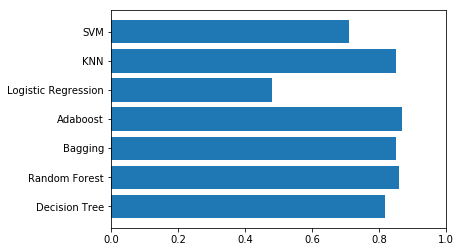

In [55]:
plt.xlim(0, 1.0)
_ = plt.barh(range(len(model_F1_score_comparisons)), list(model_F1_score_comparisons.values()), align='center')
_ = plt.yticks(range(len(model_F1_score_comparisons)), list(model_F1_score_comparisons.keys()))
print(list(model_F1_score_comparisons.values()))

[0.81, 0.81, 0.81, 0.79, 0.56, 0.78, 0.73]


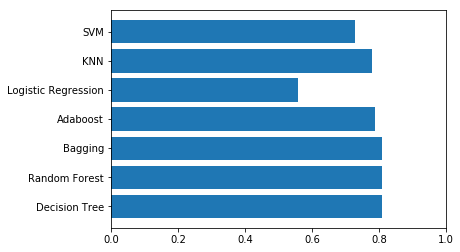

In [56]:
plt.xlim(0, 1.0)
_ = plt.barh(range(len(model_test_accuracy_comparisons)), list(model_test_accuracy_comparisons.values()), align='center')
_ = plt.yticks(range(len(model_test_accuracy_comparisons)), list(model_test_accuracy_comparisons.keys()))
print(list(model_test_accuracy_comparisons.values()))

## Examining results wrt distance and error rankings 

In [57]:
# Installing a dataset consisting of the coordinates of capital of related countries
dataset_coordinates = pd.read_csv('country coordinates.csv', encoding = "ISO-8859-1")
# display(dataset.head())

# Filtering for necessary countries
filter = dataset_coordinates.name.isin(['Greece', 'Italy', 'Spain', 'Cyprus', 'Turkey', 'England', 'Wales', 'Bulgaria'])
small_dataset = dataset_coordinates[filter]
# small_dataset

a = [('WL', 51.4816, 3.1791, 'Wales'), ('GB', 55.378051, 3.435973, 'England')]
a = pd.DataFrame(a)
a.columns = ['country', 'latitude', 'longitude', 'name']
# a

small_dataset_full = pd.concat([small_dataset, a], axis = 0)
small_dataset_full.index = range(8)
small_dataset_full.sort_values('name')

,country,latitude,longitude,name
0,BG,42.733883,25.485830,Bulgaria
1,CY,35.126413,33.429859,Cyprus
7,GB,55.378051,3.435973,England
3,GR,39.074208,21.824312,Greece
4,IT,41.871940,12.567380,Italy
2,ES,40.463667,-3.749220,Spain
5,TR,38.963745,35.243322,Turkey
6,WL,51.481600,3.179100,Wales


In [58]:
# Calculating error rankings of each pair
# IF RANK IS SMALLER, THEN THERE IS BIGGER ERROR
save_errors = pair_errors

for i in range(save_errors.shape[1]-1):    
    save_errors["rank "+str(save_errors.columns[i+1])] = save_errors.iloc[:,i+1].rank(ascending = False)

save_errors["average of errors ranking"] = save_errors[save_errors.columns[-6:]].mean(axis=1)
save_errors.sort_values(by=['average of errors ranking'])

,Pair,DT errors,RF errors,Bagging,Adaboost,KNN,SVM,rank DT errors,rank RF errors,rank Bagging,rank Adaboost,rank KNN,rank SVM,average of errors ranking
54,WalesSpain,0.2609,0.2609,0.2391,0.2826,0.1087,0.1957,1.0,1.0,2.0,1.0,5.0,5.0,2.500000
45,TurkeyGreece,0.1727,0.1545,0.1545,0.1636,0.1364,0.6091,2.0,4.0,3.0,2.0,3.0,1.0,2.500000
53,WalesItaly,0.1087,0.1957,0.2609,0.1522,0.1739,0.3478,6.0,2.0,1.0,4.0,1.0,2.0,2.666667
2,BulgariaGreece,0.1176,0.1569,0.1176,0.1569,0.1373,0.2157,3.5,3.0,4.5,3.0,2.0,3.0,3.166667
17,EnglandItaly,0.0988,0.0864,0.1111,0.0988,0.1111,0.0988,7.0,6.0,6.0,6.0,4.0,10.0,6.500000
1,BulgariaEngland,0.0784,0.1373,0.1176,0.1176,0.0588,0.1961,10.0,5.0,4.5,5.0,13.0,4.0,6.916667
0,BulgariaCyprus,0.1176,0.0392,0.0784,0.0588,0.0784,0.1176,3.5,12.5,7.0,7.0,6.5,9.0,7.583333
51,WalesEngland,0.0870,0.0435,0.0435,0.0435,0.0652,0.0870,8.0,10.0,10.5,9.5,8.5,11.0,9.583333
52,WalesGreece,0.0652,0.0652,0.0435,0.0435,0.0652,0.0217,12.0,7.0,10.5,9.5,8.5,22.0,11.583333
16,EnglandGreece,0.0247,0.0494,0.0617,0.0370,0.0370,0.0617,23.5,8.5,8.0,15.0,18.0,13.0,14.333333


In [59]:
### Calculating distances between each pair of countries' capitals
import geopy.distance
d.index.values[0:8].sort()

dist= []
total = 0
for i in range(8):
    for j in range(8):
        if i!=j:
            coords_1 = small_dataset_full.sort_values('name').iloc[i,1:3]
            coords_2 = small_dataset_full.sort_values('name').iloc[j,1:3]
            a = geopy.distance.vincenty(coords_1, coords_2).km
            dist.append(round(a,4))
            total = total+1
# dist

# Combining distances dataframe with pair names dataframe 
dist2 = pd.DataFrame(dist)
pair_distance = pd.concat([pd.DataFrame(arr), dist2],axis =1)
pair_distance.columns = ['Pair', 'Distance']
# pair_distance

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  if sys.path[0] == '':


In [60]:
# Creating Countries - Distance - Average error ranking table
import re
pair_distance2 = pd.concat([pair_distance, pair_distance],axis =1)

for i in range(pair_distance.shape[0]):
    a = re.findall('[A-Z][^A-Z]*', pair_distance["Pair"][i])
    pair_distance2.iloc[i,2] = a[0]
    pair_distance2.iloc[i,3] = a[1]

pair_distance2 = pd.concat([pair_distance2.iloc[:,2],pair_distance2.iloc[:,3], dist2, save_errors.iloc[:,-1]],axis =1)
pair_distance2.columns = ['Pair1','Pair2', 'Distance', 'average of errors ranking']
pair_distance2.sort_values('average of errors ranking')

,Pair1,Pair2,Distance,average of errors ranking
54,Wales,Spain,1335.7218,2.500000
45,Turkey,Greece,1161.1382,2.500000
53,Wales,Italy,1285.0067,2.666667
2,Bulgaria,Greece,510.1287,3.166667
17,England,Italy,1642.5777,6.500000
1,Bulgaria,England,2122.1617,6.916667
0,Bulgaria,Cyprus,1088.7510,7.583333
51,Wales,England,433.9876,9.583333
52,Wales,Greece,1999.5320,11.583333
16,England,Greece,2270.8065,14.333333


In [61]:
# Displaying countries which are the part of errors most
display(pair_distance2.sort_values('average of errors ranking').head(15)["Pair1"].value_counts())

# Average distance of pairs which cause to more error 
display(pair_distance2.sort_values('average of errors ranking').head(15)["Distance"].mean())

# Average distance of all pairs
display(pair_distance2.sort_values('average of errors ranking')["Distance"].mean())

Bulgaria    4
Wales       4
England     3
Italy       1
Turkey      1
Cyprus      1
Spain       1
Name: Pair1, dtype: int64

1288.9488999999999

1804.598303571429

In [62]:
# The table shows each countries with their first three countries causing to errors on algorithms 
bb = pd.DataFrame()
cc = pair_distance2['Pair1'].unique()

for i in range(8):
    aa = pair_distance2[pair_distance2['Pair1']==cc[i]]
    ee = aa.sort_values(by = 'average of errors ranking').iloc[0:3,1]
    ee.index = range(3)
    bb = pd.concat([bb,ee], axis = 1)

bb.columns = cc
bb

,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales
0,Greece,Turkey,Italy,Turkey,Greece,Italy,Greece,Spain
1,England,Greece,Greece,England,Spain,Greece,England,Italy
2,Cyprus,England,Spain,Cyprus,Turkey,Wales,Spain,England


In [63]:
# Correlation between error ranking and distance
# Positive correlation shows that if the distance decreases between pair countries, then error increases

np.corrcoef(pair_distance2["average of errors ranking"], pair_distance2["Distance"])

array([[1.        , 0.42323522],
       [0.42323522, 1.        ]])

### Examining misclassified samples wrt regions

In [64]:
# First group of equations are to find number of misclassified samples
#       region by region for each classification methods except LR
rr_dt = dataset.iloc[y_test[y_test!=y_pred_dt].index.values]
rrm_dt = rr_dt.groupby('Region').count().iloc[:,0]
rr_rf = dataset.iloc[y_test[y_test!=y_pred_rf].index.values]
rrm_rf = rr_rf.groupby('Region').count().iloc[:,0]
rr_bag = dataset.iloc[y_test[y_test!=y_pred_bag].index.values]
rrm_bag = rr_bag.groupby('Region').count().iloc[:,0]
rr_ada = dataset.iloc[y_test[y_test!=y_pred_ada].index.values]
rrm_ada = rr_ada.groupby('Region').count().iloc[:,0]
rr_knn = dataset.iloc[y_test[y_test!=y_pred_knn].index.values]
rrm_knn = rr_knn.groupby('Region').count().iloc[:,0]
rr_svm = dataset.iloc[y_test[y_test!=y_pred_svm].index.values]
rrm_svm = rr_svm.groupby('Region').count().iloc[:,0]

# Counting number of samples for each region
rrm2 = dataset.groupby('Region').count().iloc[:,0]
rrm2

# Calculating region error rates by dividing number of misclassified samples to 
#        total number of samples for each region and methods
reg_rate_dt = pd.DataFrame(rrm_dt/rrm2).sort_values(by=['Country'], ascending=False)
reg_rate_rf = pd.DataFrame(rrm_rf/rrm2).sort_values(by=['Country'], ascending=False)
reg_rate_bag = pd.DataFrame(rrm_bag/rrm2).sort_values(by=['Country'], ascending=False)
reg_rate_ada = pd.DataFrame(rrm_ada/rrm2).sort_values(by=['Country'], ascending=False)
reg_rate_knn = pd.DataFrame(rrm_knn/rrm2).sort_values(by=['Country'], ascending=False)
reg_rate_svm = pd.DataFrame(rrm_svm/rrm2).sort_values(by=['Country'], ascending=False)

# Combining results under one DataFrame by changing NaNs with 0
reg_rate_all = pd.concat([reg_rate_dt, reg_rate_rf,reg_rate_bag,reg_rate_ada,reg_rate_knn, reg_rate_svm], axis = 1)
reg_rate_all = reg_rate_all.fillna(0)
# Calculating the mean of error rates 
reg_mean = reg_rate_all.mean(axis=1)

# Keeping regions which average error rate is more than 0
reg_rate_all_mean = pd.concat([reg_rate_all, reg_mean], axis = 1)
reg_rate_all_mean.columns = ['DT', 'RF', 'BAG', 'ADA', 'KNN', 'SVM', 'Mean']
reg_rate_all_mean_bigger0 = reg_rate_all_mean[(reg_rate_all_mean['Mean'] > 0)]
reg_rate_all_mean_bigger0

C:\Users\aksunbul\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



,DT,RF,BAG,ADA,KNN,SVM,Mean
Almeira,0.086957,0.043478,0.043478,0.043478,0.043478,0.086957,0.057971
Altinoluk,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.020833
Andalusia,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.015152
"Antiparos, Agios Georgis",0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.018519
"Antiparos, Ayios Georgios",0.047619,0.095238,0.095238,0.095238,0.095238,0.142857,0.095238
Attica,0.028169,0.021127,0.021127,0.021127,0.021127,0.021127,0.022300
Avon,0.137931,0.137931,0.137931,0.137931,0.137931,0.103448,0.132184
Balikesir,0.071429,0.000000,0.000000,0.000000,0.071429,0.071429,0.035714
Bekten,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.083333
Burgas district,0.041667,0.020833,0.041667,0.020833,0.041667,0.145833,0.052083


In [65]:
# Combining error results with the name of countries and indexing truly 
dataset_region_country = pd.read_csv('summary_region_country.csv')
dataset_region_country.columns = ['Country','Region']
result = dataset_region_country[dataset_region_country.Region.isin(reg_rate_all_mean[(reg_rate_all_mean['Mean'] > 0)].index)]
res_sorted = result.sort_values(by='Region')
reg_rate_all_mean_bigger0.index = range(reg_rate_all_mean_bigger0.shape[0])
res_sorted.index = range(res_sorted.shape[0])
p_region = pd.concat([res_sorted, reg_rate_all_mean_bigger0], axis=1)
# p_region

In [66]:
# Preparing region names with their sample count in appropriate shape using DataFrame
region_count = pd.DataFrame(h.iloc[:,0])
region_count.columns = ["Region Count"]
region_count_index_names = pd.DataFrame(region_count.index.values)
region_count.index = range(len(region_count))
region_count_with_names = pd.concat([region_count,region_count_index_names],axis=1)
region_count_with_names.columns = ["Count","Region"]
# region_count_with_names

In [67]:
# Joining both tables created in previous two blocks using SQL join approach
left = p_region
right = region_count_with_names
f_region = pd.merge(left, right, on='Region', how='left')

# Restricting results only with regions having more than 30 samples
# The reason of choosing 30 is that
#       total number of samples for the regions with more than 30 samples forms more than 50.6% of all data
# The number of regions in the table below is 23. 
# The detailed information for the number of samples for each region can be found at the beginning of the script.
f_region_bigger30 = f_region[(f_region['Count'] > 30)]
f_region_bigger30 = f_region_bigger30[f_region_bigger30.Country.isin(d.index.values[0:8])]
f_region_bigger30.sort_values(by="Mean", ascending=False)

,Country,Region,DT,RF,BAG,ADA,KNN,SVM,Mean,Count
37,Wales,Gwynedd,0.186047,0.162791,0.162791,0.162791,0.139535,0.186047,0.166667,43
98,Greece,Rhodope,0.147059,0.117647,0.147059,0.117647,0.147059,0.264706,0.156863,34
17,England,Cornwall,0.113636,0.113636,0.090909,0.113636,0.159091,0.159091,0.125000,44
20,England,Cumbria,0.162162,0.108108,0.135135,0.135135,0.108108,0.081081,0.121622,37
22,Greece,"Cyclades, Siphnos",0.111111,0.055556,0.083333,0.083333,0.111111,0.055556,0.083333,36
88,Greece,Peloponnese,0.025000,0.025000,0.025000,0.050000,0.050000,0.175000,0.058333,40
105,Italy,"Sardinia, Iglesiente",0.041667,0.041667,0.083333,0.020833,0.041667,0.104167,0.055556,48
99,Italy,Sardinia,0.049145,0.049145,0.051282,0.051282,0.047009,0.072650,0.053419,468
9,Bulgaria,Burgas district,0.041667,0.020833,0.041667,0.020833,0.041667,0.145833,0.052083,48
96,Spain,Province of Huelva,0.051020,0.051020,0.051020,0.040816,0.040816,0.061224,0.049320,98


# R-Mclust package results

In [68]:
# Loading results of R code applying mclust package
dataset_mclust = pd.read_csv('summary_mclust.csv')
dataset_mclust.columns = ['Country','208Pb/206Pb', '206Pb/207Pb', '206Pb/204Pb', '207Pb/204Pb', '208Pb/204Pb', 'Mclust']
display(dataset_mclust.head())

,Country,208Pb/206Pb,206Pb/207Pb,206Pb/204Pb,207Pb/204Pb,208Pb/204Pb,Mclust
0,Egypt,2.07167,1.065417,18.800,17.645680,38.947396,8
1,Eire,2.10380,1.094451,18.178,16.609239,38.242876,8
2,Eire,2.14261,1.117743,17.253,15.435569,36.966450,8
3,Egypt,2.11090,1.139134,17.630,15.476672,37.215167,8
4,Italy,2.12330,1.141279,17.812,15.607053,37.820220,3


In [69]:
# Filtering for 8 most countries
filter = dataset_mclust.Country.isin(dataset_mclust["Country"].value_counts().index.values[0:8])
dataset_mclust_filtered = dataset_mclust[filter]
table_data = pd.crosstab(dataset_mclust_filtered.iloc[:,0], dataset_mclust_filtered.iloc[:,6], rownames = ['Countries'], colnames = ['Clusters'])
table_data_margins = pd.crosstab(dataset_mclust_filtered.iloc[:,0], dataset_mclust_filtered.iloc[:,6], rownames = ['Countries'], colnames = ['Clusters'], margins=True)

# Creating column names
cluster_names = list()
for i in range(9):
    cluster_names.append("c"+str(i))
    
table_data.columns = cluster_names
table_data_margins

Clusters,1,2,3,4,5,6,7,8,9,All
Countries,,,,,,,,,,
Bulgaria,1,3,1,44,6,62,19,0,0,136
Cyprus,0,69,0,27,4,40,347,2,1,490
England,13,7,6,207,0,3,22,3,0,261
Greece,9,171,14,85,294,190,36,11,528,1338
Italy,262,3,268,78,7,132,13,6,1,770
Spain,215,50,178,37,70,112,6,31,29,728
Turkey,0,98,6,36,92,80,26,8,15,361
Wales,95,1,9,37,0,0,1,3,0,146
All,595,402,482,551,473,619,470,64,574,4230


In [70]:
# Dividing values of crosstab above one by one to ALL column
arr = pd.concat([table_data, table_data_margins.iloc[0:8,len(table_data.columns)]], axis = 1)
brrr = pd.concat([table_data, pd.DataFrame(arr.iloc[:,0].div(arr["All"]))], axis = 1)
for i in range(len(table_data.columns)-1):
    brrr = pd.concat([brrr, pd.DataFrame(arr.iloc[:,i+1].div(arr["All"]))], axis = 1)

# Choosing only rates part of the matrix
rates = brrr.iloc[:,len(table_data.columns):len(table_data.columns)*2]
rates.columns =  brrr.columns[0:len(table_data.columns)]
# rates

# Showing which countries are parts of every cluster
# COUNTRIES WRITTEN IN CAPITAL LETTERS MEAN THAT
# They are big part of that cluster (if more than 30% of a country's samples are in that cluster)
# IF THEY ARE WRITTEN IN SMALL LETTERS
# Then, they are small part of that cluster (if more than 10% of a country's samples are in that cluster)
b = str()
cluster_names = str()
for i in range(rates.shape[1]):
    for j in range(rates.shape[0]):
        if rates.iloc[j,i]>0.3:
            a = rates.index.values[j]
            b = a.upper() + " " + b
            a = str()
        elif rates.iloc[j,i]>0.1:
            a = rates.index.values[j]
            b = b + " " + a
            a = str()
    cluster_names = cluster_names  + "/" + b
    b = str()
cluster_names.split('/')[-rates.shape[1]:]

['WALES ITALY  Spain',
 ' Cyprus Greece Turkey',
 'ITALY  Spain',
 'ENGLAND BULGARIA  Italy Wales',
 ' Greece Turkey',
 'BULGARIA  Greece Italy Spain Turkey',
 'CYPRUS  Bulgaria',
 '',
 'GREECE ']

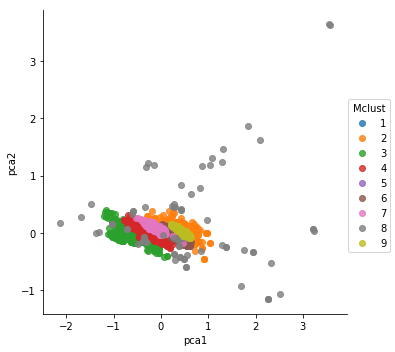

In [71]:
# Applying pca to downsize columns into two to be able to show them on a scatter plot 
pca2 = PCA(n_components = 2)
X_pca = pca2.fit_transform(X_full)
# Changing type to dataframe
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['pca1', 'pca2']

# MCLUST clusters in scatter plot
X_pca_mclust = pd.concat([X_pca, dataset_mclust["Mclust"]], axis = 1)
sns.lmplot( x="pca1", y="pca2", data=X_pca_mclust, fit_reg=False, hue='Mclust')

## Neural Networks 

In [72]:
# Function to create model, required for KerasClassifier
def create_model(optimiser = "rmsprop", hidden_units = 512):
    # create model
    model = Sequential()
    model.add(Dense(input_dim=5, units=hidden_units))
    model.add(Activation("sigmoid"))
    model.add(Dense(units=np.unique(y_train).shape[0]))
    model.add(Activation("softmax"))
    # Compile model
    model.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [73]:
param_grid ={'optimiser': ['rmsprop', 'adam', 'sgd'], \
             'hidden_units':[200],
#            'epochs': [20, 50, 100, 150], \
              'epochs': [1000], \
#             'batch_size': [8, 16, 32, 64]}
             'batch_size': [32]}
 
# ['rmsprop', 'adam']

model = KerasClassifier(build_fn=create_model, verbose=1)
my_tuned_model = GridSearchCV(estimator=model, param_grid=param_grid, verbose = 1)
my_tuned_model.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (my_tuned_model.best_score_, my_tuned_model.best_params_))
means = my_tuned_model.cv_results_['mean_test_score']
stds = my_tuned_model.cv_results_['std_test_score']
params = my_tuned_model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\aksunbul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/1000
1974/1974 [==============================] - 2s 932us/step - loss: 1.7089 - acc: 0.3941
Epoch 2/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.5426 - acc: 0.4767
Epoch 3/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.4724 - acc: 0.5010
Epoch 4/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.4230 - acc: 0.5122
Epoch 5/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.3906 - acc: 0.5122
Epoch 6/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.3677 - acc: 0.5172
Epoch 7/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.3514 - acc: 0.5228
Epoch 8/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.3396 - acc: 0.5228
Epoch 9/1000
1974/1974 [==============================] - 0s 55us/step - loss: 1.3302 - acc: 0.5274
Epoch 10/1000
1974/1974 [===============

1974/1974 [==============================] - 0s 36us/step - loss: 1.0785 - acc: 0.6266
Epoch 82/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0769 - acc: 0.6282
Epoch 83/1000
1974/1974 [==============================] - 0s 34us/step - loss: 1.0758 - acc: 0.6322
Epoch 84/1000
1974/1974 [==============================] - 0s 35us/step - loss: 1.0740 - acc: 0.6302
Epoch 85/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0701 - acc: 0.6337
Epoch 86/1000
1974/1974 [==============================] - 0s 34us/step - loss: 1.0691 - acc: 0.6388
Epoch 87/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0693 - acc: 0.6393
Epoch 88/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0684 - acc: 0.6327
Epoch 89/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0675 - acc: 0.6403
Epoch 90/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0633 - acc: 0.6373
Epoc

1974/1974 [==============================] - 0s 36us/step - loss: 0.9910 - acc: 0.6651
Epoch 162/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9903 - acc: 0.6677
Epoch 163/1000
1974/1974 [==============================] - 0s 34us/step - loss: 0.9865 - acc: 0.6662
Epoch 164/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9874 - acc: 0.6727
Epoch 165/1000
1974/1974 [==============================] - 0s 34us/step - loss: 0.9839 - acc: 0.6692
Epoch 166/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9858 - acc: 0.6657
Epoch 167/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9854 - acc: 0.6712
Epoch 168/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9836 - acc: 0.6672
Epoch 169/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9807 - acc: 0.6687
Epoch 170/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9841 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.9406 - acc: 0.6814
Epoch 242/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9407 - acc: 0.6864
Epoch 243/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9420 - acc: 0.6798
Epoch 244/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9387 - acc: 0.6788
Epoch 245/1000
1974/1974 [==============================] - 0s 34us/step - loss: 0.9417 - acc: 0.6829
Epoch 246/1000
1974/1974 [==============================] - 0s 34us/step - loss: 0.9373 - acc: 0.6793
Epoch 247/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9393 - acc: 0.6803
Epoch 248/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9392 - acc: 0.6879
Epoch 249/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9389 - acc: 0.6844
Epoch 250/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9360 - acc: 0.

1974/1974 [==============================] - 0s 35us/step - loss: 0.9069 - acc: 0.6945
Epoch 322/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9017 - acc: 0.6915
Epoch 323/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9067 - acc: 0.6925
Epoch 324/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9049 - acc: 0.6935
Epoch 325/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9047 - acc: 0.6940
Epoch 326/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9054 - acc: 0.6960
Epoch 327/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9030 - acc: 0.6915
Epoch 328/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9034 - acc: 0.6960
Epoch 329/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9029 - acc: 0.6935
Epoch 330/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9007 - acc: 0.

1974/1974 [==============================] - 0s 53us/step - loss: 0.8782 - acc: 0.7006
Epoch 402/1000
1974/1974 [==============================] - 0s 53us/step - loss: 0.8773 - acc: 0.7026
Epoch 403/1000
1974/1974 [==============================] - 0s 51us/step - loss: 0.8734 - acc: 0.7128
Epoch 404/1000
1974/1974 [==============================] - 0s 51us/step - loss: 0.8760 - acc: 0.7047
Epoch 405/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.8769 - acc: 0.7052
Epoch 406/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.8746 - acc: 0.7031
Epoch 407/1000
1974/1974 [==============================] - 0s 55us/step - loss: 0.8795 - acc: 0.6986
Epoch 408/1000
1974/1974 [==============================] - 0s 50us/step - loss: 0.8741 - acc: 0.7006
Epoch 409/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.8752 - acc: 0.7011
Epoch 410/1000
1974/1974 [==============================] - 0s 50us/step - loss: 0.8740 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 0.8561 - acc: 0.7062
Epoch 482/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8563 - acc: 0.7067
Epoch 483/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8524 - acc: 0.7082
Epoch 484/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8548 - acc: 0.7062
Epoch 485/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8558 - acc: 0.7092
Epoch 486/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8555 - acc: 0.7087
Epoch 487/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8531 - acc: 0.7112
Epoch 488/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8532 - acc: 0.7112
Epoch 489/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8533 - acc: 0.7077
Epoch 490/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8521 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.8347 - acc: 0.7148
Epoch 562/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8382 - acc: 0.7138
Epoch 563/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8350 - acc: 0.7128
Epoch 564/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8352 - acc: 0.7163
Epoch 565/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8342 - acc: 0.7148
Epoch 566/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8339 - acc: 0.7112
Epoch 567/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8334 - acc: 0.7143
Epoch 568/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8363 - acc: 0.7087
Epoch 569/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8352 - acc: 0.7143
Epoch 570/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8361 - acc: 0.

1974/1974 [==============================] - 0s 40us/step - loss: 0.8208 - acc: 0.7194
Epoch 642/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8180 - acc: 0.7229
Epoch 643/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8213 - acc: 0.7194
Epoch 644/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8203 - acc: 0.7163
Epoch 645/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8204 - acc: 0.7204
Epoch 646/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8198 - acc: 0.7229
Epoch 647/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8212 - acc: 0.7173
Epoch 648/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8193 - acc: 0.7219
Epoch 649/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8197 - acc: 0.7209
Epoch 650/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8197 - acc: 0.

1974/1974 [==============================] - 0s 36us/step - loss: 0.8093 - acc: 0.7219
Epoch 722/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8080 - acc: 0.7234
Epoch 723/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8070 - acc: 0.7254
Epoch 724/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8069 - acc: 0.7229
Epoch 725/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8076 - acc: 0.7239
Epoch 726/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8064 - acc: 0.7239
Epoch 727/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8057 - acc: 0.7259
Epoch 728/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8054 - acc: 0.7239
Epoch 729/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8050 - acc: 0.7153
Epoch 730/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8040 - acc: 0.

1974/1974 [==============================] - 0s 36us/step - loss: 0.7955 - acc: 0.7254
Epoch 802/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7965 - acc: 0.7259
Epoch 803/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.7931 - acc: 0.7315
Epoch 804/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.7942 - acc: 0.7280
Epoch 805/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.7937 - acc: 0.7224
Epoch 806/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.7938 - acc: 0.7264
Epoch 807/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7951 - acc: 0.7315
Epoch 808/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.7933 - acc: 0.7275
Epoch 809/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7951 - acc: 0.7285
Epoch 810/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7927 - acc: 0.

1974/1974 [==============================] - 0s 42us/step - loss: 0.7854 - acc: 0.7264
Epoch 882/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7841 - acc: 0.7290
Epoch 883/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7822 - acc: 0.7315
Epoch 884/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7841 - acc: 0.7244
Epoch 885/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7862 - acc: 0.7310
Epoch 886/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.7821 - acc: 0.7330
Epoch 887/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.7848 - acc: 0.7295
Epoch 888/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7834 - acc: 0.7335
Epoch 889/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.7843 - acc: 0.7285
Epoch 890/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7812 - acc: 0.

1974/1974 [==============================] - 0s 36us/step - loss: 0.7735 - acc: 0.7356
Epoch 962/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7729 - acc: 0.7330
Epoch 963/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.7725 - acc: 0.7361
Epoch 964/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7729 - acc: 0.7330
Epoch 965/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7738 - acc: 0.7325
Epoch 966/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7737 - acc: 0.7310
Epoch 967/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.7739 - acc: 0.7264
Epoch 968/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7726 - acc: 0.7335
Epoch 969/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.7732 - acc: 0.7340
Epoch 970/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7732 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 1.1648 - acc: 0.5932
Epoch 42/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1656 - acc: 0.5932
Epoch 43/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1567 - acc: 0.6028
Epoch 44/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1536 - acc: 0.6049
Epoch 45/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1537 - acc: 0.6028
Epoch 46/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1468 - acc: 0.6059
Epoch 47/1000
1974/1974 [==============================] - 0s 35us/step - loss: 1.1460 - acc: 0.6013
Epoch 48/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1439 - acc: 0.6074
Epoch 49/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.1409 - acc: 0.6084
Epoch 50/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.1358 - acc: 0.6059
Epoc

1974/1974 [==============================] - 0s 38us/step - loss: 1.0498 - acc: 0.6307
Epoch 122/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.0474 - acc: 0.6424
Epoch 123/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.0479 - acc: 0.6408
Epoch 124/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.0491 - acc: 0.6363
Epoch 125/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0453 - acc: 0.6418
Epoch 126/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0471 - acc: 0.6368
Epoch 127/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.0440 - acc: 0.6449
Epoch 128/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0438 - acc: 0.6479
Epoch 129/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0445 - acc: 0.6373
Epoch 130/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0433 - acc: 0.

1974/1974 [==============================] - 0s 43us/step - loss: 0.9980 - acc: 0.6677
Epoch 202/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9992 - acc: 0.6636
Epoch 203/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9958 - acc: 0.6601
Epoch 204/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9982 - acc: 0.6646
Epoch 205/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9978 - acc: 0.6631
Epoch 206/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9954 - acc: 0.6702
Epoch 207/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9952 - acc: 0.6631
Epoch 208/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9964 - acc: 0.6687
Epoch 209/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9965 - acc: 0.6667
Epoch 210/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9943 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 0.9614 - acc: 0.6753
Epoch 282/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9631 - acc: 0.6733
Epoch 283/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9633 - acc: 0.6809
Epoch 284/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9620 - acc: 0.6727
Epoch 285/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9617 - acc: 0.6743
Epoch 286/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9601 - acc: 0.6717
Epoch 287/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9612 - acc: 0.6722
Epoch 288/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9613 - acc: 0.6738
Epoch 289/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9615 - acc: 0.6768
Epoch 290/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9595 - acc: 0.

1974/1974 [==============================] - 0s 36us/step - loss: 0.9381 - acc: 0.6844
Epoch 362/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9367 - acc: 0.6829
Epoch 363/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9368 - acc: 0.6819
Epoch 364/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9373 - acc: 0.6844
Epoch 365/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9381 - acc: 0.6824
Epoch 366/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9346 - acc: 0.6844
Epoch 367/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9351 - acc: 0.6849
Epoch 368/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9370 - acc: 0.6829
Epoch 369/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9365 - acc: 0.6859
Epoch 370/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9358 - acc: 0.

1974/1974 [==============================] - 0s 46us/step - loss: 0.9173 - acc: 0.6864
Epoch 442/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9165 - acc: 0.6834
Epoch 443/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9141 - acc: 0.6930
Epoch 444/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9161 - acc: 0.6930
Epoch 445/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9149 - acc: 0.6874
Epoch 446/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9155 - acc: 0.6890
Epoch 447/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9130 - acc: 0.6940
Epoch 448/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9169 - acc: 0.6890
Epoch 449/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9149 - acc: 0.6890
Epoch 450/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9132 - acc: 0.

1974/1974 [==============================] - 0s 36us/step - loss: 0.8943 - acc: 0.7011
Epoch 521/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8976 - acc: 0.6900
Epoch 522/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8991 - acc: 0.6915
Epoch 523/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8985 - acc: 0.6935
Epoch 524/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8970 - acc: 0.6935
Epoch 525/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8963 - acc: 0.6955
Epoch 526/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.8971 - acc: 0.6971
Epoch 527/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8962 - acc: 0.6915
Epoch 528/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8951 - acc: 0.7001
Epoch 529/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8933 - acc: 0.

1974/1974 [==============================] - 0s 50us/step - loss: 0.8818 - acc: 0.6971
Epoch 601/1000
1974/1974 [==============================] - 0s 60us/step - loss: 0.8815 - acc: 0.7026
Epoch 602/1000
1974/1974 [==============================] - 0s 62us/step - loss: 0.8781 - acc: 0.6955
Epoch 603/1000
1974/1974 [==============================] - 0s 80us/step - loss: 0.8797 - acc: 0.6991
Epoch 604/1000
1974/1974 [==============================] - 0s 72us/step - loss: 0.8780 - acc: 0.7016
Epoch 605/1000
1974/1974 [==============================] - 0s 61us/step - loss: 0.8815 - acc: 0.6971
Epoch 606/1000
1974/1974 [==============================] - 0s 72us/step - loss: 0.8791 - acc: 0.6976
Epoch 607/1000
1974/1974 [==============================] - 0s 169us/step - loss: 0.8800 - acc: 0.6981
Epoch 608/1000
1974/1974 [==============================] - 0s 160us/step - loss: 0.8775 - acc: 0.6955
Epoch 609/1000
1974/1974 [==============================] - 0s 176us/step - loss: 0.8770 - acc:

1974/1974 [==============================] - 0s 44us/step - loss: 0.8669 - acc: 0.7047
Epoch 681/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8637 - acc: 0.7042
Epoch 682/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8661 - acc: 0.7021
Epoch 683/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8668 - acc: 0.7026
Epoch 684/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8652 - acc: 0.7042
Epoch 685/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8628 - acc: 0.7026
Epoch 686/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8654 - acc: 0.7001
Epoch 687/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8640 - acc: 0.7006
Epoch 688/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8630 - acc: 0.7036
Epoch 689/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8659 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 0.8509 - acc: 0.7067
Epoch 761/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8526 - acc: 0.7057
Epoch 762/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.8511 - acc: 0.7057
Epoch 763/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8507 - acc: 0.7042
Epoch 764/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8501 - acc: 0.7057
Epoch 765/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8531 - acc: 0.7036
Epoch 766/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8501 - acc: 0.7102
Epoch 767/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.8512 - acc: 0.7052
Epoch 768/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8508 - acc: 0.7026
Epoch 769/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8504 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.8406 - acc: 0.7067
Epoch 841/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8422 - acc: 0.7102
Epoch 842/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8405 - acc: 0.7118
Epoch 843/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8432 - acc: 0.7006
Epoch 844/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8399 - acc: 0.7062
Epoch 845/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8411 - acc: 0.7036
Epoch 846/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8385 - acc: 0.7021
Epoch 847/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8417 - acc: 0.7057
Epoch 848/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8411 - acc: 0.7138
Epoch 849/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8404 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.8332 - acc: 0.7067
Epoch 921/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8323 - acc: 0.7072
Epoch 922/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8318 - acc: 0.7087
Epoch 923/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8327 - acc: 0.7072
Epoch 924/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8319 - acc: 0.7067
Epoch 925/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8304 - acc: 0.7077
Epoch 926/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.8320 - acc: 0.7087
Epoch 927/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8330 - acc: 0.7067
Epoch 928/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8334 - acc: 0.7087
Epoch 929/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8326 - acc: 0.

987/987 [==============================] - 0s 90us/step
Epoch 1/1000
1974/1974 [==============================] - 0s 176us/step - loss: 1.6959 - acc: 0.3992
Epoch 2/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.5493 - acc: 0.4519
Epoch 3/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.4778 - acc: 0.4873
Epoch 4/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.4294 - acc: 0.4980
Epoch 5/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.3934 - acc: 0.5132
Epoch 6/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.3696 - acc: 0.5101
Epoch 7/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.3468 - acc: 0.5182
Epoch 8/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.3304 - acc: 0.5314
Epoch 9/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.3211 - acc: 0.5314
Epoch 10/1000
1974/1974 [==================

1974/1974 [==============================] - 0s 37us/step - loss: 1.0850 - acc: 0.6256
Epoch 81/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0868 - acc: 0.6322
Epoch 82/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.0840 - acc: 0.6342
Epoch 83/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0826 - acc: 0.6322
Epoch 84/1000
1974/1974 [==============================] - 0s 35us/step - loss: 1.0793 - acc: 0.6353
Epoch 85/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0799 - acc: 0.6348
Epoch 86/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0800 - acc: 0.6358
Epoch 87/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0764 - acc: 0.6332
Epoch 88/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.0769 - acc: 0.6312
Epoch 89/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.0734 - acc: 0.6277
Epoc

Epoch 160/1000
1974/1974 [==============================] - 0s 35us/step - loss: 1.0090 - acc: 0.6596
Epoch 161/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0089 - acc: 0.6515
Epoch 162/1000
1974/1974 [==============================] - 0s 31us/step - loss: 1.0069 - acc: 0.6535
Epoch 163/1000
1974/1974 [==============================] - 0s 31us/step - loss: 1.0061 - acc: 0.6530
Epoch 164/1000
1974/1974 [==============================] - 0s 32us/step - loss: 1.0063 - acc: 0.6591
Epoch 165/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.0073 - acc: 0.6591
Epoch 166/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0067 - acc: 0.6591
Epoch 167/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0033 - acc: 0.6591
Epoch 168/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.0055 - acc: 0.6530
Epoch 169/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1

1974/1974 [==============================] - 0s 37us/step - loss: 0.9664 - acc: 0.6702
Epoch 241/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.9674 - acc: 0.6758
Epoch 242/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9639 - acc: 0.6717
Epoch 243/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9648 - acc: 0.6662
Epoch 244/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9690 - acc: 0.6722
Epoch 245/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9657 - acc: 0.6727
Epoch 246/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9661 - acc: 0.6672
Epoch 247/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9658 - acc: 0.6727
Epoch 248/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9635 - acc: 0.6722
Epoch 249/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9638 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.9382 - acc: 0.6814
Epoch 321/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9375 - acc: 0.6793
Epoch 322/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9396 - acc: 0.6788
Epoch 323/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9360 - acc: 0.6839
Epoch 324/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9359 - acc: 0.6819
Epoch 325/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9354 - acc: 0.6819
Epoch 326/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9362 - acc: 0.6895
Epoch 327/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9359 - acc: 0.6859
Epoch 328/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9362 - acc: 0.6773
Epoch 329/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9344 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.9142 - acc: 0.6874
Epoch 401/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9118 - acc: 0.6930
Epoch 402/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9133 - acc: 0.6940
Epoch 403/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.9108 - acc: 0.6945
Epoch 404/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9095 - acc: 0.6890
Epoch 405/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9110 - acc: 0.6895
Epoch 406/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.9096 - acc: 0.6869
Epoch 407/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9107 - acc: 0.6915
Epoch 408/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9111 - acc: 0.6915
Epoch 409/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9112 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 0.8877 - acc: 0.6950
Epoch 481/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8900 - acc: 0.6950
Epoch 482/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8890 - acc: 0.6991
Epoch 483/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8844 - acc: 0.7016
Epoch 484/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8885 - acc: 0.6915
Epoch 485/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8888 - acc: 0.6935
Epoch 486/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8893 - acc: 0.6996
Epoch 487/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.8866 - acc: 0.6960
Epoch 488/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8867 - acc: 0.7011
Epoch 489/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8871 - acc: 0.

1974/1974 [==============================] - 0s 42us/step - loss: 0.8737 - acc: 0.6996
Epoch 561/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8712 - acc: 0.6971
Epoch 562/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8681 - acc: 0.7031
Epoch 563/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8685 - acc: 0.7047
Epoch 564/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8685 - acc: 0.7036
Epoch 565/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8696 - acc: 0.7082
Epoch 566/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8682 - acc: 0.7021
Epoch 567/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8705 - acc: 0.7026
Epoch 568/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8669 - acc: 0.7042
Epoch 569/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8713 - acc: 0.

1974/1974 [==============================] - 0s 42us/step - loss: 0.8536 - acc: 0.7042
Epoch 641/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8535 - acc: 0.7016
Epoch 642/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8528 - acc: 0.7062
Epoch 643/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8554 - acc: 0.7097
Epoch 644/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8532 - acc: 0.7082
Epoch 645/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8519 - acc: 0.7067
Epoch 646/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8532 - acc: 0.7006
Epoch 647/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8530 - acc: 0.7062
Epoch 648/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8531 - acc: 0.7057
Epoch 649/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8548 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.8390 - acc: 0.7107
Epoch 721/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8414 - acc: 0.7016
Epoch 722/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8368 - acc: 0.7077
Epoch 723/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8371 - acc: 0.7067
Epoch 724/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8403 - acc: 0.7087
Epoch 725/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8379 - acc: 0.7057
Epoch 726/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8406 - acc: 0.7062
Epoch 727/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8384 - acc: 0.7097
Epoch 728/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.8390 - acc: 0.7072
Epoch 729/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.8393 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.8254 - acc: 0.7097
Epoch 800/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8251 - acc: 0.7118
Epoch 801/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8259 - acc: 0.7158
Epoch 802/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8248 - acc: 0.7123
Epoch 803/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8247 - acc: 0.7097
Epoch 804/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8232 - acc: 0.7112
Epoch 805/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8253 - acc: 0.7112
Epoch 806/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8227 - acc: 0.7148
Epoch 807/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8235 - acc: 0.7123
Epoch 808/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.8229 - acc: 0.

1974/1974 [==============================] - 0s 43us/step - loss: 0.8143 - acc: 0.7138
Epoch 880/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8126 - acc: 0.7118
Epoch 881/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.8114 - acc: 0.7138
Epoch 882/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8125 - acc: 0.7102
Epoch 883/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8123 - acc: 0.7168
Epoch 884/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.8106 - acc: 0.7178
Epoch 885/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8103 - acc: 0.7148
Epoch 886/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8109 - acc: 0.7138
Epoch 887/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8121 - acc: 0.7118
Epoch 888/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8096 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.8021 - acc: 0.7158
Epoch 960/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8005 - acc: 0.7214
Epoch 961/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7969 - acc: 0.7199
Epoch 962/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8002 - acc: 0.7138
Epoch 963/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8000 - acc: 0.7153
Epoch 964/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8003 - acc: 0.7178
Epoch 965/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7999 - acc: 0.7173
Epoch 966/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.7997 - acc: 0.7188
Epoch 967/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7999 - acc: 0.7168
Epoch 968/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.7976 - acc: 0.

Epoch 39/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.1834 - acc: 0.5902
Epoch 40/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1844 - acc: 0.5963
Epoch 41/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1802 - acc: 0.5973
Epoch 42/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1763 - acc: 0.5912
Epoch 43/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1706 - acc: 0.6033
Epoch 44/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1654 - acc: 0.6028
Epoch 45/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1633 - acc: 0.6064
Epoch 46/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.1589 - acc: 0.6008
Epoch 47/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1583 - acc: 0.6059
Epoch 48/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1560 - ac

1974/1974 [==============================] - 0s 37us/step - loss: 1.0388 - acc: 0.6429
Epoch 120/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.0329 - acc: 0.6459
Epoch 121/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.0302 - acc: 0.6459
Epoch 122/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0310 - acc: 0.6444
Epoch 123/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.0306 - acc: 0.6510
Epoch 124/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0341 - acc: 0.6499
Epoch 125/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.0287 - acc: 0.6474
Epoch 126/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.0304 - acc: 0.6474
Epoch 127/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.0301 - acc: 0.6439
Epoch 128/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.0256 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 0.9638 - acc: 0.6722
Epoch 200/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9643 - acc: 0.6768
Epoch 201/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9613 - acc: 0.6697
Epoch 202/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.9619 - acc: 0.6743
Epoch 203/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9650 - acc: 0.6773
Epoch 204/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9633 - acc: 0.6753
Epoch 205/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9598 - acc: 0.6738
Epoch 206/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9596 - acc: 0.6748
Epoch 207/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9599 - acc: 0.6722
Epoch 208/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9606 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.9195 - acc: 0.6849
Epoch 280/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9200 - acc: 0.6834
Epoch 281/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9196 - acc: 0.6798
Epoch 282/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9197 - acc: 0.6905
Epoch 283/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9186 - acc: 0.6895
Epoch 284/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9160 - acc: 0.6879
Epoch 285/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9178 - acc: 0.6874
Epoch 286/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9213 - acc: 0.6874
Epoch 287/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9129 - acc: 0.6910
Epoch 288/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9177 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 0.8845 - acc: 0.6966
Epoch 360/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8853 - acc: 0.6991
Epoch 361/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8842 - acc: 0.6955
Epoch 362/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8874 - acc: 0.6960
Epoch 363/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8845 - acc: 0.6966
Epoch 364/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8930 - acc: 0.6824
Epoch 365/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8836 - acc: 0.6966
Epoch 366/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8837 - acc: 0.6935
Epoch 367/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8880 - acc: 0.7001
Epoch 368/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8844 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.8625 - acc: 0.7031
Epoch 440/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8664 - acc: 0.7072
Epoch 441/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8616 - acc: 0.7072
Epoch 442/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8608 - acc: 0.7118
Epoch 443/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8641 - acc: 0.7011
Epoch 444/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8625 - acc: 0.7047
Epoch 445/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8606 - acc: 0.7092
Epoch 446/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8601 - acc: 0.7072
Epoch 447/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8633 - acc: 0.7042
Epoch 448/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8614 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.8415 - acc: 0.7102
Epoch 520/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8424 - acc: 0.7178
Epoch 521/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8426 - acc: 0.7128
Epoch 522/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8408 - acc: 0.7163
Epoch 523/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8410 - acc: 0.7112
Epoch 524/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8408 - acc: 0.7107
Epoch 525/1000
1974/1974 [==============================] - 0s 48us/step - loss: 0.8392 - acc: 0.7138
Epoch 526/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8460 - acc: 0.7123
Epoch 527/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8396 - acc: 0.7092
Epoch 528/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8422 - acc: 0.

1974/1974 [==============================] - 0s 42us/step - loss: 0.8260 - acc: 0.7194
Epoch 600/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8268 - acc: 0.7194
Epoch 601/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8283 - acc: 0.7163
Epoch 602/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8264 - acc: 0.7118
Epoch 603/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8291 - acc: 0.7128
Epoch 604/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8292 - acc: 0.7183
Epoch 605/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8262 - acc: 0.7163
Epoch 606/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8290 - acc: 0.7214
Epoch 607/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8273 - acc: 0.7214
Epoch 608/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8242 - acc: 0.

1974/1974 [==============================] - 0s 35us/step - loss: 0.8169 - acc: 0.7158
Epoch 680/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8102 - acc: 0.7244
Epoch 681/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8146 - acc: 0.7204
Epoch 682/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8110 - acc: 0.7168
Epoch 683/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8149 - acc: 0.7158
Epoch 684/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8144 - acc: 0.7239
Epoch 685/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8149 - acc: 0.7158
Epoch 686/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8119 - acc: 0.7194
Epoch 687/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8128 - acc: 0.7209
Epoch 688/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8091 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.7983 - acc: 0.7259
Epoch 760/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.8011 - acc: 0.7254
Epoch 761/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.7969 - acc: 0.7356
Epoch 762/1000
1974/1974 [==============================] - 0s 67us/step - loss: 0.7970 - acc: 0.7229
Epoch 763/1000
1974/1974 [==============================] - 0s 69us/step - loss: 0.7998 - acc: 0.7183
Epoch 764/1000
1974/1974 [==============================] - 0s 63us/step - loss: 0.7984 - acc: 0.7320: 0s - loss: 0.7888 - acc: 0.72
Epoch 765/1000
1974/1974 [==============================] - 0s 58us/step - loss: 0.7966 - acc: 0.7300
Epoch 766/1000
1974/1974 [==============================] - 0s 55us/step - loss: 0.8019 - acc: 0.7239
Epoch 767/1000
1974/1974 [==============================] - 0s 56us/step - loss: 0.7959 - acc: 0.7290
Epoch 768/1000
1974/1974 [==============================] - 0s 77u

1974/1974 [==============================] - 0s 38us/step - loss: 0.7844 - acc: 0.7285
Epoch 840/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.7869 - acc: 0.7320
Epoch 841/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7922 - acc: 0.7300
Epoch 842/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.7845 - acc: 0.7285
Epoch 843/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7923 - acc: 0.7310
Epoch 844/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.7836 - acc: 0.7330
Epoch 845/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7841 - acc: 0.7290
Epoch 846/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.7845 - acc: 0.7305
Epoch 847/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.7865 - acc: 0.7315
Epoch 848/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.7811 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.7761 - acc: 0.7330
Epoch 920/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7750 - acc: 0.7351
Epoch 921/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7737 - acc: 0.7305
Epoch 922/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.7731 - acc: 0.7280
Epoch 923/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7729 - acc: 0.7356
Epoch 924/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.7743 - acc: 0.7305
Epoch 925/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7732 - acc: 0.7351
Epoch 926/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.7719 - acc: 0.7325
Epoch 927/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.7756 - acc: 0.7305
Epoch 928/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7758 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.7655 - acc: 0.7351
Epoch 1000/1000
987/987 [==============================] - 0s 113us/step
Epoch 1/1000
1974/1974 [==============================] - 0s 246us/step - loss: 1.7913 - acc: 0.3480
Epoch 2/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.5890 - acc: 0.4265
Epoch 3/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.5110 - acc: 0.4595
Epoch 4/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.4570 - acc: 0.4848
Epoch 5/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.4227 - acc: 0.4823
Epoch 6/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.3950 - acc: 0.4970
Epoch 7/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.3778 - acc: 0.4944
Epoch 8/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.3600 - acc: 0.4949
Epoch 9/1000
1974/1974 [===============

1974/1974 [==============================] - 0s 39us/step - loss: 1.0870 - acc: 0.6266
Epoch 80/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.0883 - acc: 0.6261
Epoch 81/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.0863 - acc: 0.6216
Epoch 82/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0881 - acc: 0.6190
Epoch 83/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0889 - acc: 0.6216
Epoch 84/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.0839 - acc: 0.6216
Epoch 85/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0827 - acc: 0.6241
Epoch 86/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.0777 - acc: 0.6201
Epoch 87/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0817 - acc: 0.6231
Epoch 88/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.0764 - acc: 0.6272
Epoc

1974/1974 [==============================] - 0s 47us/step - loss: 1.0187 - acc: 0.6479
Epoch 160/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0228 - acc: 0.6499
Epoch 161/1000
1974/1974 [==============================] - 0s 51us/step - loss: 1.0194 - acc: 0.6505
Epoch 162/1000
1974/1974 [==============================] - 0s 49us/step - loss: 1.0159 - acc: 0.6515
Epoch 163/1000
1974/1974 [==============================] - 0s 50us/step - loss: 1.0215 - acc: 0.6510
Epoch 164/1000
1974/1974 [==============================] - 0s 49us/step - loss: 1.0181 - acc: 0.6555
Epoch 165/1000
1974/1974 [==============================] - 0s 50us/step - loss: 1.0184 - acc: 0.6510
Epoch 166/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.0170 - acc: 0.6484
Epoch 167/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.0120 - acc: 0.6540
Epoch 168/1000
1974/1974 [==============================] - 0s 50us/step - loss: 1.0122 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.9810 - acc: 0.6641
Epoch 240/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9764 - acc: 0.6662
Epoch 241/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.9857 - acc: 0.6667
Epoch 242/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.9802 - acc: 0.6677
Epoch 243/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9797 - acc: 0.6672
Epoch 244/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9800 - acc: 0.6672
Epoch 245/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9790 - acc: 0.6636
Epoch 246/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9793 - acc: 0.6641
Epoch 247/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9822 - acc: 0.6611
Epoch 248/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9767 - acc: 0.

1974/1974 [==============================] - 0s 151us/step - loss: 0.9548 - acc: 0.6692
Epoch 319/1000
1974/1974 [==============================] - 0s 164us/step - loss: 0.9534 - acc: 0.6692
Epoch 320/1000
1974/1974 [==============================] - 0s 155us/step - loss: 0.9600 - acc: 0.6677
Epoch 321/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.9546 - acc: 0.6748
Epoch 322/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.9543 - acc: 0.6687
Epoch 323/1000
1974/1974 [==============================] - ETA: 0s - loss: 0.9525 - acc: 0.676 - 0s 49us/step - loss: 0.9540 - acc: 0.6733
Epoch 324/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.9536 - acc: 0.6707
Epoch 325/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9509 - acc: 0.6697
Epoch 326/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9533 - acc: 0.6733
Epoch 327/1000
1974/1974 [==============================

1974/1974 [==============================] - 0s 37us/step - loss: 0.9314 - acc: 0.6783
Epoch 398/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9333 - acc: 0.6738
Epoch 399/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9304 - acc: 0.6748
Epoch 400/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9267 - acc: 0.6748
Epoch 401/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9263 - acc: 0.6793
Epoch 402/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9276 - acc: 0.6768
Epoch 403/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9299 - acc: 0.6874
Epoch 404/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9278 - acc: 0.6814
Epoch 405/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9258 - acc: 0.6884
Epoch 406/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9308 - acc: 0.

1974/1974 [==============================] - 0s 43us/step - loss: 0.9104 - acc: 0.6859
Epoch 478/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.9077 - acc: 0.6895
Epoch 479/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9086 - acc: 0.6819
Epoch 480/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9065 - acc: 0.6869
Epoch 481/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.9084 - acc: 0.6864
Epoch 482/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.9077 - acc: 0.6793
Epoch 483/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.9075 - acc: 0.6859
Epoch 484/1000
1974/1974 [==============================] - 0s 48us/step - loss: 0.9063 - acc: 0.6869
Epoch 485/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9056 - acc: 0.6890
Epoch 486/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9051 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 0.8866 - acc: 0.6950
Epoch 558/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8904 - acc: 0.6945
Epoch 559/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8901 - acc: 0.6874
Epoch 560/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8909 - acc: 0.6879
Epoch 561/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8884 - acc: 0.6935
Epoch 562/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8884 - acc: 0.6950
Epoch 563/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8844 - acc: 0.6950
Epoch 564/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8858 - acc: 0.6935
Epoch 565/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.8852 - acc: 0.6976
Epoch 566/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8850 - acc: 0.

1974/1974 [==============================] - 0s 45us/step - loss: 0.8695 - acc: 0.7016
Epoch 638/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8686 - acc: 0.7016
Epoch 639/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8718 - acc: 0.7016
Epoch 640/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8675 - acc: 0.6966
Epoch 641/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8637 - acc: 0.6955
Epoch 642/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8690 - acc: 0.6996
Epoch 643/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8707 - acc: 0.6976
Epoch 644/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8680 - acc: 0.7021
Epoch 645/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8648 - acc: 0.7026
Epoch 646/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8659 - acc: 0.

1974/1974 [==============================] - 0s 44us/step - loss: 0.8542 - acc: 0.7031
Epoch 718/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8552 - acc: 0.7006
Epoch 719/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.8528 - acc: 0.7087
Epoch 720/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8532 - acc: 0.7052
Epoch 721/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8530 - acc: 0.7011
Epoch 722/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8514 - acc: 0.7006
Epoch 723/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8517 - acc: 0.7062
Epoch 724/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8506 - acc: 0.7067
Epoch 725/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8526 - acc: 0.7092
Epoch 726/1000
1974/1974 [==============================] - ETA: 0s - loss: 0.8278 - acc: 0.716 -

1974/1974 [==============================] - 0s 37us/step - loss: 0.8398 - acc: 0.7102
Epoch 798/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8364 - acc: 0.7107
Epoch 799/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8407 - acc: 0.7067
Epoch 800/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8393 - acc: 0.7087
Epoch 801/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8388 - acc: 0.7072
Epoch 802/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8379 - acc: 0.7143
Epoch 803/1000
1974/1974 [==============================] - 0s 48us/step - loss: 0.8376 - acc: 0.7097
Epoch 804/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8394 - acc: 0.7087
Epoch 805/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8383 - acc: 0.7057
Epoch 806/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8401 - acc: 0.

1974/1974 [==============================] - 0s 37us/step - loss: 0.8258 - acc: 0.7148
Epoch 878/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8276 - acc: 0.7118
Epoch 879/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8285 - acc: 0.7123
Epoch 880/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8302 - acc: 0.7052
Epoch 881/1000
1974/1974 [==============================] - 0s 52us/step - loss: 0.8266 - acc: 0.7082
Epoch 882/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.8281 - acc: 0.7087
Epoch 883/1000
1974/1974 [==============================] - 0s 50us/step - loss: 0.8253 - acc: 0.7148
Epoch 884/1000
1974/1974 [==============================] - 0s 51us/step - loss: 0.8269 - acc: 0.7092
Epoch 885/1000
1974/1974 [==============================] - 0s 55us/step - loss: 0.8247 - acc: 0.7143
Epoch 886/1000
1974/1974 [==============================] - 0s 54us/step - loss: 0.8271 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 0.8173 - acc: 0.7158
Epoch 958/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8156 - acc: 0.7153
Epoch 959/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8215 - acc: 0.7143
Epoch 960/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8162 - acc: 0.7097
Epoch 961/1000
1974/1974 [==============================] - 0s 38us/step - loss: 0.8167 - acc: 0.7163
Epoch 962/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8177 - acc: 0.7188
Epoch 963/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8169 - acc: 0.7128
Epoch 964/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8173 - acc: 0.7163
Epoch 965/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8159 - acc: 0.7128
Epoch 966/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8176 - acc: 0.

1974/1974 [==============================] - 0s 52us/step - loss: 1.1853 - acc: 0.6049
Epoch 38/1000
1974/1974 [==============================] - 0s 53us/step - loss: 1.1810 - acc: 0.6044
Epoch 39/1000
1974/1974 [==============================] - 0s 60us/step - loss: 1.1811 - acc: 0.5978
Epoch 40/1000
1974/1974 [==============================] - 0s 60us/step - loss: 1.1724 - acc: 0.6049
Epoch 41/1000
1974/1974 [==============================] - 0s 124us/step - loss: 1.1731 - acc: 0.5998
Epoch 42/1000
1974/1974 [==============================] - 0s 169us/step - loss: 1.1664 - acc: 0.6049
Epoch 43/1000
1974/1974 [==============================] - 0s 160us/step - loss: 1.1668 - acc: 0.6089
Epoch 44/1000
1974/1974 [==============================] - 0s 102us/step - loss: 1.1657 - acc: 0.6049
Epoch 45/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.1600 - acc: 0.6079
Epoch 46/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.1560 - acc: 0.6079


1974/1974 [==============================] - ETA: 0s - loss: 1.0548 - acc: 0.630 - 0s 38us/step - loss: 1.0343 - acc: 0.6429
Epoch 118/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0361 - acc: 0.6429
Epoch 119/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.0353 - acc: 0.6469
Epoch 120/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.0298 - acc: 0.6469
Epoch 121/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0326 - acc: 0.6464
Epoch 122/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0356 - acc: 0.6434
Epoch 123/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0286 - acc: 0.6479
Epoch 124/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0294 - acc: 0.6510
Epoch 125/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0322 - acc: 0.6479
Epoch 126/1000
1974/1974 [==============================] -

1974/1974 [==============================] - 0s 42us/step - loss: 0.9762 - acc: 0.6611
Epoch 197/1000
1974/1974 [==============================] - 0s 50us/step - loss: 0.9762 - acc: 0.6692
Epoch 198/1000
1974/1974 [==============================] - 0s 48us/step - loss: 0.9744 - acc: 0.6733
Epoch 199/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9722 - acc: 0.6682
Epoch 200/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.9737 - acc: 0.6697
Epoch 201/1000
1974/1974 [==============================] - 0s 51us/step - loss: 0.9755 - acc: 0.6702
Epoch 202/1000
1974/1974 [==============================] - 0s 51us/step - loss: 0.9749 - acc: 0.6677
Epoch 203/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.9706 - acc: 0.6748
Epoch 204/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9735 - acc: 0.6722
Epoch 205/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.9739 - acc: 0.

1974/1974 [==============================] - 0s 42us/step - loss: 0.9357 - acc: 0.6778
Epoch 277/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9382 - acc: 0.6819
Epoch 278/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9405 - acc: 0.6819
Epoch 279/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9404 - acc: 0.6869
Epoch 280/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9358 - acc: 0.6829
Epoch 281/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.9339 - acc: 0.6839
Epoch 282/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9428 - acc: 0.6829
Epoch 283/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9347 - acc: 0.6905
Epoch 284/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9350 - acc: 0.6849
Epoch 285/1000
1974/1974 [==============================] - 0s 46us/step - loss: 0.9338 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 0.9075 - acc: 0.6925
Epoch 357/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9073 - acc: 0.6910
Epoch 358/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.9088 - acc: 0.6925
Epoch 359/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9075 - acc: 0.6960
Epoch 360/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.9079 - acc: 0.6986
Epoch 361/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.9071 - acc: 0.6950
Epoch 362/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9102 - acc: 0.6925
Epoch 363/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9068 - acc: 0.6950
Epoch 364/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.9058 - acc: 0.6920
Epoch 365/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.9052 - acc: 0.

1974/1974 [==============================] - 0s 44us/step - loss: 0.8865 - acc: 0.7006
Epoch 437/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8826 - acc: 0.7087
Epoch 438/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8806 - acc: 0.7052
Epoch 439/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8827 - acc: 0.7052
Epoch 440/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8839 - acc: 0.6986
Epoch 441/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8800 - acc: 0.7016
Epoch 442/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8818 - acc: 0.7031
Epoch 443/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8839 - acc: 0.7016
Epoch 444/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8811 - acc: 0.7067
Epoch 445/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8807 - acc: 0.

1974/1974 [==============================] - 0s 36us/step - loss: 0.8617 - acc: 0.7077
Epoch 517/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8612 - acc: 0.7006
Epoch 518/1000
1974/1974 [==============================] - 0s 34us/step - loss: 0.8610 - acc: 0.7016
Epoch 519/1000
1974/1974 [==============================] - 0s 36us/step - loss: 0.8620 - acc: 0.7052
Epoch 520/1000
1974/1974 [==============================] - 0s 35us/step - loss: 0.8586 - acc: 0.7047
Epoch 521/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8599 - acc: 0.7077
Epoch 522/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8597 - acc: 0.7097
Epoch 523/1000
1974/1974 [==============================] - 0s 48us/step - loss: 0.8616 - acc: 0.7016
Epoch 524/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8625 - acc: 0.7067
Epoch 525/1000
1974/1974 [==============================] - 0s 47us/step - loss: 0.8613 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 0.8430 - acc: 0.7067
Epoch 597/1000
1974/1974 [==============================] - 0s 37us/step - loss: 0.8416 - acc: 0.7153
Epoch 598/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8413 - acc: 0.7133
Epoch 599/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8415 - acc: 0.7057
Epoch 600/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8425 - acc: 0.7087
Epoch 601/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8392 - acc: 0.7092
Epoch 602/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8383 - acc: 0.7092
Epoch 603/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8433 - acc: 0.7072
Epoch 604/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.8407 - acc: 0.7021
Epoch 605/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8376 - acc: 0.

1974/1974 [==============================] - 0s 73us/step - loss: 0.8234 - acc: 0.7173
Epoch 677/1000
1974/1974 [==============================] - 0s 69us/step - loss: 0.8229 - acc: 0.7138
Epoch 678/1000
1974/1974 [==============================] - 0s 66us/step - loss: 0.8212 - acc: 0.7143
Epoch 679/1000
1974/1974 [==============================] - 0s 63us/step - loss: 0.8244 - acc: 0.7138
Epoch 680/1000
1974/1974 [==============================] - 0s 59us/step - loss: 0.8225 - acc: 0.7143
Epoch 681/1000
1974/1974 [==============================] - 0s 133us/step - loss: 0.8270 - acc: 0.7163
Epoch 682/1000
1974/1974 [==============================] - 0s 159us/step - loss: 0.8196 - acc: 0.7173
Epoch 683/1000
1974/1974 [==============================] - 0s 153us/step - loss: 0.8225 - acc: 0.7138
Epoch 684/1000
1974/1974 [==============================] - 0s 100us/step - loss: 0.8226 - acc: 0.7128
Epoch 685/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8228 - acc

1974/1974 [==============================] - 0s 41us/step - loss: 0.8066 - acc: 0.7153
Epoch 757/1000
1974/1974 [==============================] - 0s 40us/step - loss: 0.8100 - acc: 0.7118
Epoch 758/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.8064 - acc: 0.7163
Epoch 759/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8106 - acc: 0.7143
Epoch 760/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.8099 - acc: 0.7153
Epoch 761/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8066 - acc: 0.7204
Epoch 762/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.8041 - acc: 0.7173
Epoch 763/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.8077 - acc: 0.7153
Epoch 764/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8072 - acc: 0.7178
Epoch 765/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.8064 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 0.7963 - acc: 0.7204
Epoch 837/1000
1974/1974 [==============================] - 0s 45us/step - loss: 0.7932 - acc: 0.7194
Epoch 838/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.7958 - acc: 0.7204
Epoch 839/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7950 - acc: 0.7209
Epoch 840/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.7924 - acc: 0.7224
Epoch 841/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.7987 - acc: 0.7163
Epoch 842/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.7947 - acc: 0.7209
Epoch 843/1000
1974/1974 [==============================] - 0s 39us/step - loss: 0.7952 - acc: 0.7194
Epoch 844/1000
1974/1974 [==============================] - 0s 42us/step - loss: 0.7920 - acc: 0.7214
Epoch 845/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.7917 - acc: 0.

1974/1974 [==============================] - 0s 49us/step - loss: 0.7852 - acc: 0.7173
Epoch 917/1000
1974/1974 [==============================] - 0s 44us/step - loss: 0.7817 - acc: 0.7143
Epoch 918/1000
1974/1974 [==============================] - 0s 52us/step - loss: 0.7829 - acc: 0.7219
Epoch 919/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.7809 - acc: 0.7219
Epoch 920/1000
1974/1974 [==============================] - 0s 49us/step - loss: 0.7809 - acc: 0.7229
Epoch 921/1000
1974/1974 [==============================] - ETA: 0s - loss: 0.7960 - acc: 0.719 - 0s 46us/step - loss: 0.7815 - acc: 0.7219
Epoch 922/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7816 - acc: 0.7209
Epoch 923/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7841 - acc: 0.7188
Epoch 924/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7805 - acc: 0.7219
Epoch 925/1000
1974/1974 [==============================] -

1974/1974 [==============================] - 0s 42us/step - loss: 0.7694 - acc: 0.7305
Epoch 997/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.7686 - acc: 0.7285
Epoch 998/1000
1974/1974 [==============================] - 0s 41us/step - loss: 0.7717 - acc: 0.7295
Epoch 999/1000
1974/1974 [==============================] - 0s 43us/step - loss: 0.7724 - acc: 0.7270
Epoch 1000/1000
987/987 [==============================] - 0s 142us/step
Epoch 1/1000
1974/1974 [==============================] - 0s 239us/step - loss: 1.8454 - acc: 0.3267
Epoch 2/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.7676 - acc: 0.3409
Epoch 3/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.7331 - acc: 0.3830
Epoch 4/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.7029 - acc: 0.4068
Epoch 5/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.6780 - acc: 0.4291
Epoch 6/1000
1974/1974 [=========

1974/1974 [==============================] - 0s 41us/step - loss: 1.3464 - acc: 0.5182
Epoch 77/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.3451 - acc: 0.5157
Epoch 78/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.3448 - acc: 0.5177
Epoch 79/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.3435 - acc: 0.5213
Epoch 80/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.3437 - acc: 0.5152
Epoch 81/1000
1974/1974 [==============================] - 0s 49us/step - loss: 1.3399 - acc: 0.5238
Epoch 82/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.3409 - acc: 0.5177
Epoch 83/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.3391 - acc: 0.5157
Epoch 84/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.3393 - acc: 0.5238
Epoch 85/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.3381 - acc: 0.5142
Epoc

1974/1974 [==============================] - 0s 41us/step - loss: 1.2988 - acc: 0.5410
Epoch 157/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2975 - acc: 0.5471
Epoch 158/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2972 - acc: 0.5385
Epoch 159/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2963 - acc: 0.5380
Epoch 160/1000
1974/1974 [==============================] - 0s 49us/step - loss: 1.2965 - acc: 0.5420
Epoch 161/1000
1974/1974 [==============================] - 0s 62us/step - loss: 1.2968 - acc: 0.5415
Epoch 162/1000
1974/1974 [==============================] - 0s 66us/step - loss: 1.2940 - acc: 0.5441
Epoch 163/1000
1974/1974 [==============================] - 0s 63us/step - loss: 1.2953 - acc: 0.5400
Epoch 164/1000
1974/1974 [==============================] - 0s 58us/step - loss: 1.2944 - acc: 0.5395
Epoch 165/1000
1974/1974 [==============================] - 0s 57us/step - loss: 1.2951 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 1.2623 - acc: 0.5694
Epoch 237/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2637 - acc: 0.5659
Epoch 238/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.2636 - acc: 0.5648
Epoch 239/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2628 - acc: 0.5643
Epoch 240/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.2612 - acc: 0.5684
Epoch 241/1000
1974/1974 [==============================] - 0s 36us/step - loss: 1.2623 - acc: 0.5674
Epoch 242/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2613 - acc: 0.5664
Epoch 243/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2607 - acc: 0.5659
Epoch 244/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2604 - acc: 0.5674
Epoch 245/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2600 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 1.2342 - acc: 0.5821
Epoch 317/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2344 - acc: 0.5795
Epoch 318/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2340 - acc: 0.5770
Epoch 319/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.2325 - acc: 0.5846
Epoch 320/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2328 - acc: 0.5780
Epoch 321/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2320 - acc: 0.5846
Epoch 322/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2331 - acc: 0.5800
Epoch 323/1000
1974/1974 [==============================] - 0s 50us/step - loss: 1.2319 - acc: 0.5836
Epoch 324/1000
1974/1974 [==============================] - 0s 69us/step - loss: 1.2312 - acc: 0.5790
Epoch 325/1000
1974/1974 [==============================] - 0s 71us/step - loss: 1.2314 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 1.2077 - acc: 0.5902
Epoch 396/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.2086 - acc: 0.5876
Epoch 397/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2089 - acc: 0.5902
Epoch 398/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2079 - acc: 0.5897
Epoch 399/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2082 - acc: 0.5892
Epoch 400/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2071 - acc: 0.5892
Epoch 401/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.2074 - acc: 0.5861
Epoch 402/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2071 - acc: 0.5841
Epoch 403/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.2064 - acc: 0.5831
Epoch 404/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2072 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 1.1862 - acc: 0.5917
Epoch 476/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1855 - acc: 0.5927
Epoch 477/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1855 - acc: 0.5952
Epoch 478/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1842 - acc: 0.5968
Epoch 479/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1846 - acc: 0.6008
Epoch 480/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1845 - acc: 0.5942
Epoch 481/1000
1974/1974 [==============================] - ETA: 0s - loss: 1.1723 - acc: 0.599 - 0s 40us/step - loss: 1.1836 - acc: 0.5922
Epoch 482/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1844 - acc: 0.5973
Epoch 483/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1842 - acc: 0.5942
Epoch 484/1000
1974/1974 [==============================] -

1974/1974 [==============================] - 0s 39us/step - loss: 1.1636 - acc: 0.6018
Epoch 556/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1647 - acc: 0.6054
Epoch 557/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1636 - acc: 0.6028
Epoch 558/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1642 - acc: 0.6013
Epoch 559/1000
1974/1974 [==============================] - 0s 50us/step - loss: 1.1634 - acc: 0.6033
Epoch 560/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.1624 - acc: 0.6044
Epoch 561/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1632 - acc: 0.6023
Epoch 562/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1617 - acc: 0.6013
Epoch 563/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1621 - acc: 0.6023
Epoch 564/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1629 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 1.1454 - acc: 0.6094
Epoch 636/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1448 - acc: 0.6089
Epoch 637/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1447 - acc: 0.6104
Epoch 638/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1447 - acc: 0.6079
Epoch 639/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1446 - acc: 0.6114
Epoch 640/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1435 - acc: 0.6069
Epoch 641/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1450 - acc: 0.6054
Epoch 642/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1438 - acc: 0.6109
Epoch 643/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1438 - acc: 0.6054
Epoch 644/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1436 - acc: 0.

1974/1974 [==============================] - 0s 40us/step - loss: 1.1289 - acc: 0.6114
Epoch 716/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1283 - acc: 0.6109
Epoch 717/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1281 - acc: 0.6145
Epoch 718/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1286 - acc: 0.6130
Epoch 719/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1286 - acc: 0.6125
Epoch 720/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1273 - acc: 0.6125
Epoch 721/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1269 - acc: 0.6125
Epoch 722/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1275 - acc: 0.6125
Epoch 723/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1277 - acc: 0.6160
Epoch 724/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1268 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 1.1141 - acc: 0.6221
Epoch 796/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1140 - acc: 0.6206
Epoch 797/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1137 - acc: 0.6211
Epoch 798/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1141 - acc: 0.6201
Epoch 799/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1144 - acc: 0.6211
Epoch 800/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1143 - acc: 0.6196
Epoch 801/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1144 - acc: 0.6175
Epoch 802/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1122 - acc: 0.6216
Epoch 803/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.1138 - acc: 0.6241
Epoch 804/1000
1974/1974 [==============================] - 0s 51us/step - loss: 1.1122 - acc: 0.

1974/1974 [==============================] - 0s 40us/step - loss: 1.1013 - acc: 0.6261
Epoch 876/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1024 - acc: 0.6261
Epoch 877/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1025 - acc: 0.6256
Epoch 878/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1020 - acc: 0.6226
Epoch 879/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1019 - acc: 0.6251
Epoch 880/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1013 - acc: 0.6201
Epoch 881/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1010 - acc: 0.6256
Epoch 882/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1010 - acc: 0.6266
Epoch 883/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1015 - acc: 0.6256
Epoch 884/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1010 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 1.0911 - acc: 0.6277
Epoch 956/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.0900 - acc: 0.6261
Epoch 957/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0915 - acc: 0.6246
Epoch 958/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0914 - acc: 0.6272
Epoch 959/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.0905 - acc: 0.6287
Epoch 960/1000
1974/1974 [==============================] - ETA: 0s - loss: 1.0812 - acc: 0.624 - 0s 38us/step - loss: 1.0910 - acc: 0.6251
Epoch 961/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.0904 - acc: 0.6266
Epoch 962/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0902 - acc: 0.6292
Epoch 963/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0902 - acc: 0.6246
Epoch 964/1000
1974/1974 [==============================] -

1974/1974 [==============================] - 0s 38us/step - loss: 1.4365 - acc: 0.4873
Epoch 35/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.4328 - acc: 0.4873
Epoch 36/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.4303 - acc: 0.4833
Epoch 37/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.4261 - acc: 0.4909
Epoch 38/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.4230 - acc: 0.4838
Epoch 39/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.4209 - acc: 0.4889
Epoch 40/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.4178 - acc: 0.4853
Epoch 41/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.4156 - acc: 0.4914
Epoch 42/1000
1974/1974 [==============================] - 0s 37us/step - loss: 1.4110 - acc: 0.4909: 0s - loss: 1.4127 - acc: 0.492
Epoch 43/1000
1974/1974 [==============================] - 0s 41us/step -

1974/1974 [==============================] - 0s 43us/step - loss: 1.3282 - acc: 0.5081
Epoch 115/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.3304 - acc: 0.5132
Epoch 116/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.3297 - acc: 0.5086
Epoch 117/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.3286 - acc: 0.5096
Epoch 118/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.3279 - acc: 0.5127
Epoch 119/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.3269 - acc: 0.5162
Epoch 120/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.3274 - acc: 0.5096
Epoch 121/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.3254 - acc: 0.5162
Epoch 122/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.3261 - acc: 0.5041
Epoch 123/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.3254 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 1.2923 - acc: 0.5426
Epoch 195/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.2942 - acc: 0.5355
Epoch 196/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2937 - acc: 0.5370
Epoch 197/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2928 - acc: 0.5420
Epoch 198/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.2909 - acc: 0.5350
Epoch 199/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2915 - acc: 0.5385
Epoch 200/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2927 - acc: 0.5456
Epoch 201/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2920 - acc: 0.5420
Epoch 202/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2899 - acc: 0.5426
Epoch 203/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2913 - acc: 0.

1974/1974 [==============================] - 0s 40us/step - loss: 1.2639 - acc: 0.5628
Epoch 275/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2639 - acc: 0.5603
Epoch 276/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2638 - acc: 0.5613
Epoch 277/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2625 - acc: 0.5633
Epoch 278/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2635 - acc: 0.5578
Epoch 279/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2623 - acc: 0.5664
Epoch 280/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2614 - acc: 0.5598
Epoch 281/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.2616 - acc: 0.5572
Epoch 282/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2606 - acc: 0.5593
Epoch 283/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2617 - acc: 0.

1974/1974 [==============================] - 0s 39us/step - loss: 1.2379 - acc: 0.5790
Epoch 355/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2375 - acc: 0.5735
Epoch 356/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2369 - acc: 0.5724
Epoch 357/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2368 - acc: 0.5805
Epoch 358/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2363 - acc: 0.5735
Epoch 359/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.2363 - acc: 0.5760
Epoch 360/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.2356 - acc: 0.5775
Epoch 361/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.2360 - acc: 0.5750
Epoch 362/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2358 - acc: 0.5745
Epoch 363/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2354 - acc: 0.

1974/1974 [==============================] - 0s 40us/step - loss: 1.2142 - acc: 0.5876
Epoch 435/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2127 - acc: 0.5861
Epoch 436/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.2132 - acc: 0.5831
Epoch 437/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2126 - acc: 0.5927
Epoch 438/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.2117 - acc: 0.5826
Epoch 439/1000
1974/1974 [==============================] - ETA: 0s - loss: 1.1985 - acc: 0.578 - 0s 41us/step - loss: 1.2114 - acc: 0.5841
Epoch 440/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2125 - acc: 0.5871
Epoch 441/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2108 - acc: 0.5887
Epoch 442/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2116 - acc: 0.5851
Epoch 443/1000
1974/1974 [==============================] -

1974/1974 [==============================] - 0s 41us/step - loss: 1.1912 - acc: 0.5952
Epoch 514/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1897 - acc: 0.5942
Epoch 515/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1892 - acc: 0.5927
Epoch 516/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1892 - acc: 0.5983
Epoch 517/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1886 - acc: 0.5978
Epoch 518/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1881 - acc: 0.5963
Epoch 519/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1885 - acc: 0.5988
Epoch 520/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1885 - acc: 0.5952
Epoch 521/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1877 - acc: 0.5963
Epoch 522/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1875 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 1.1674 - acc: 0.6013
Epoch 594/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1675 - acc: 0.6013
Epoch 595/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1658 - acc: 0.6018
Epoch 596/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1660 - acc: 0.5998
Epoch 597/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1665 - acc: 0.6018
Epoch 598/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1653 - acc: 0.6003
Epoch 599/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1661 - acc: 0.5993
Epoch 600/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1655 - acc: 0.6023
Epoch 601/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1651 - acc: 0.5963
Epoch 602/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1637 - acc: 0.

1974/1974 [==============================] - 0s 47us/step - loss: 1.1463 - acc: 0.6064
Epoch 674/1000
1974/1974 [==============================] - 0s 51us/step - loss: 1.1468 - acc: 0.6023
Epoch 675/1000
1974/1974 [==============================] - 0s 49us/step - loss: 1.1460 - acc: 0.6018
Epoch 676/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1460 - acc: 0.6064
Epoch 677/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.1462 - acc: 0.6074
Epoch 678/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1447 - acc: 0.6094
Epoch 679/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1452 - acc: 0.6008
Epoch 680/1000
1974/1974 [==============================] - 0s 50us/step - loss: 1.1444 - acc: 0.6028
Epoch 681/1000
1974/1974 [==============================] - 0s 48us/step - loss: 1.1441 - acc: 0.6018
Epoch 682/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1437 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 1.1291 - acc: 0.6145
Epoch 754/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1292 - acc: 0.6084
Epoch 755/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1292 - acc: 0.6084
Epoch 756/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1284 - acc: 0.6165
Epoch 757/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1282 - acc: 0.6160
Epoch 758/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1278 - acc: 0.6145
Epoch 759/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1282 - acc: 0.6120
Epoch 760/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1276 - acc: 0.6130
Epoch 761/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1277 - acc: 0.6130
Epoch 762/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1275 - acc: 0.

1974/1974 [==============================] - 0s 40us/step - loss: 1.1158 - acc: 0.6221
Epoch 834/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1154 - acc: 0.6196
Epoch 835/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1150 - acc: 0.6160
Epoch 836/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1156 - acc: 0.6231
Epoch 837/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1150 - acc: 0.6231
Epoch 838/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1142 - acc: 0.6221
Epoch 839/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1148 - acc: 0.6190
Epoch 840/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1138 - acc: 0.6180
Epoch 841/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1129 - acc: 0.6236
Epoch 842/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1144 - acc: 0.

1974/1974 [==============================] - 0s 41us/step - loss: 1.1025 - acc: 0.6231
Epoch 914/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1048 - acc: 0.6185
Epoch 915/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1043 - acc: 0.6206
Epoch 916/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1039 - acc: 0.6190
Epoch 917/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1039 - acc: 0.6287
Epoch 918/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1037 - acc: 0.6231
Epoch 919/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1027 - acc: 0.6231
Epoch 920/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1035 - acc: 0.6226
Epoch 921/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1024 - acc: 0.6226
Epoch 922/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1034 - acc: 0.

1974/1974 [==============================] - 0s 36us/step - loss: 1.0949 - acc: 0.6231
Epoch 993/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0947 - acc: 0.6216
Epoch 994/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.0948 - acc: 0.6246
Epoch 995/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.0939 - acc: 0.6180
Epoch 996/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.0946 - acc: 0.6251
Epoch 997/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0939 - acc: 0.6272
Epoch 998/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0946 - acc: 0.6206
Epoch 999/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.0937 - acc: 0.6256
Epoch 1000/1000
987/987 [==============================] - 0s 171us/step
Epoch 1/1000
1974/1974 [==============================] - 1s 263us/step - loss: 1.8612 - acc: 0.2948
Epoch 2/1000
1974/1974 [=

1974/1974 [==============================] - 0s 37us/step - loss: 1.3362 - acc: 0.5218
Epoch 73/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.3359 - acc: 0.5233
Epoch 74/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.3346 - acc: 0.5309
Epoch 75/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.3333 - acc: 0.5324
Epoch 76/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.3313 - acc: 0.5299
Epoch 77/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.3312 - acc: 0.5213
Epoch 78/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.3300 - acc: 0.5314
Epoch 79/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.3290 - acc: 0.5294
Epoch 80/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.3275 - acc: 0.5299
Epoch 81/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.3270 - acc: 0.5309
Epoc

1974/1974 [==============================] - 0s 42us/step - loss: 1.2854 - acc: 0.5486
Epoch 153/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.2846 - acc: 0.5502
Epoch 154/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2824 - acc: 0.5527
Epoch 155/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2828 - acc: 0.5517
Epoch 156/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2822 - acc: 0.5502
Epoch 157/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.2823 - acc: 0.5537
Epoch 158/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2811 - acc: 0.5527
Epoch 159/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2813 - acc: 0.5471
Epoch 160/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2816 - acc: 0.5507
Epoch 161/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2808 - acc: 0.

1974/1974 [==============================] - 0s 42us/step - loss: 1.2537 - acc: 0.5653
Epoch 233/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2542 - acc: 0.5704
Epoch 234/1000
1974/1974 [==============================] - 0s 51us/step - loss: 1.2549 - acc: 0.5628
Epoch 235/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.2534 - acc: 0.5709
Epoch 236/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2531 - acc: 0.5643
Epoch 237/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2523 - acc: 0.5709
Epoch 238/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2522 - acc: 0.5704
Epoch 239/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2531 - acc: 0.5704
Epoch 240/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2523 - acc: 0.5689
Epoch 241/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2523 - acc: 0.

1974/1974 [==============================] - 0s 40us/step - loss: 1.2320 - acc: 0.5887
Epoch 313/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.2309 - acc: 0.5897
Epoch 314/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2312 - acc: 0.5836
Epoch 315/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.2321 - acc: 0.5856
Epoch 316/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.2319 - acc: 0.5866
Epoch 317/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2303 - acc: 0.5826
Epoch 318/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2308 - acc: 0.5851
Epoch 319/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2310 - acc: 0.5846
Epoch 320/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.2301 - acc: 0.5968
Epoch 321/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.2307 - acc: 0.

1974/1974 [==============================] - 0s 46us/step - loss: 1.2136 - acc: 0.5942
Epoch 393/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.2121 - acc: 0.5917
Epoch 394/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.2129 - acc: 0.5912
Epoch 395/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.2121 - acc: 0.5957
Epoch 396/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.2117 - acc: 0.5983
Epoch 397/1000
1974/1974 [==============================] - 0s 51us/step - loss: 1.2120 - acc: 0.5937
Epoch 398/1000
1974/1974 [==============================] - 0s 47us/step - loss: 1.2121 - acc: 0.5978
Epoch 399/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2109 - acc: 0.6033
Epoch 400/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.2114 - acc: 0.5952
Epoch 401/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.2112 - acc: 0.

1974/1974 [==============================] - 0s 43us/step - loss: 1.1926 - acc: 0.6059
Epoch 473/1000
1974/1974 [==============================] - ETA: 0s - loss: 1.2016 - acc: 0.603 - 0s 43us/step - loss: 1.1933 - acc: 0.6059
Epoch 474/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1929 - acc: 0.6018
Epoch 475/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1924 - acc: 0.6059
Epoch 476/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1927 - acc: 0.6013
Epoch 477/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1924 - acc: 0.6044
Epoch 478/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1919 - acc: 0.6059
Epoch 479/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1921 - acc: 0.6054
Epoch 480/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1911 - acc: 0.6079
Epoch 481/1000
1974/1974 [==============================] -

1974/1974 [==============================] - 0s 39us/step - loss: 1.1741 - acc: 0.6135
Epoch 553/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1726 - acc: 0.6114
Epoch 554/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1725 - acc: 0.6130
Epoch 555/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1727 - acc: 0.6099
Epoch 556/1000
1974/1974 [==============================] - 0s 44us/step - loss: 1.1734 - acc: 0.6130
Epoch 557/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1718 - acc: 0.6130
Epoch 558/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1723 - acc: 0.6165
Epoch 559/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1713 - acc: 0.6135
Epoch 560/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1704 - acc: 0.6120
Epoch 561/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1710 - acc: 0.

1974/1974 [==============================] - 0s 55us/step - loss: 1.1524 - acc: 0.6140
Epoch 633/1000
1974/1974 [==============================] - 0s 62us/step - loss: 1.1535 - acc: 0.6155
Epoch 634/1000
1974/1974 [==============================] - 0s 156us/step - loss: 1.1524 - acc: 0.6185
Epoch 635/1000
1974/1974 [==============================] - 0s 161us/step - loss: 1.1533 - acc: 0.6155
Epoch 636/1000
1974/1974 [==============================] - 0s 152us/step - loss: 1.1525 - acc: 0.6150
Epoch 637/1000
1974/1974 [==============================] - 0s 55us/step - loss: 1.1519 - acc: 0.6160
Epoch 638/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.1519 - acc: 0.6216: 0s - loss: 1.1311 - acc: 0.628
Epoch 639/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1510 - acc: 0.6196
Epoch 640/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1515 - acc: 0.6175
Epoch 641/1000
1974/1974 [==============================] - 0s

1974/1974 [==============================] - 0s 39us/step - loss: 1.1364 - acc: 0.6180
Epoch 712/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.1359 - acc: 0.6236
Epoch 713/1000
1974/1974 [==============================] - ETA: 0s - loss: 1.1460 - acc: 0.617 - 0s 44us/step - loss: 1.1362 - acc: 0.6185
Epoch 714/1000
1974/1974 [==============================] - ETA: 0s - loss: 1.1205 - acc: 0.638 - 0s 41us/step - loss: 1.1352 - acc: 0.6277
Epoch 715/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1370 - acc: 0.6206
Epoch 716/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1355 - acc: 0.6221
Epoch 717/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1350 - acc: 0.6216
Epoch 718/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1349 - acc: 0.6216
Epoch 719/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1346 - acc: 0.6261
Epoch 720/1000
1974/1

1974/1974 [==============================] - 0s 38us/step - loss: 1.1214 - acc: 0.6292
Epoch 791/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1208 - acc: 0.6241
Epoch 792/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.1227 - acc: 0.6266
Epoch 793/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1213 - acc: 0.6292
Epoch 794/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1211 - acc: 0.6292
Epoch 795/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1215 - acc: 0.6266
Epoch 796/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1202 - acc: 0.6307
Epoch 797/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1195 - acc: 0.6211
Epoch 798/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.1206 - acc: 0.6256
Epoch 799/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1203 - acc: 0.

1974/1974 [==============================] - 0s 38us/step - loss: 1.1096 - acc: 0.6317
Epoch 871/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1090 - acc: 0.6297
Epoch 872/1000
1974/1974 [==============================] - 0s 39us/step - loss: 1.1098 - acc: 0.6348
Epoch 873/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.1096 - acc: 0.6312
Epoch 874/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1088 - acc: 0.6282
Epoch 875/1000
1974/1974 [==============================] - 0s 46us/step - loss: 1.1081 - acc: 0.6322
Epoch 876/1000
1974/1974 [==============================] - ETA: 0s - loss: 1.0951 - acc: 0.631 - 0s 39us/step - loss: 1.1082 - acc: 0.6332
Epoch 877/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1087 - acc: 0.6322
Epoch 878/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.1078 - acc: 0.6292
Epoch 879/1000
1974/1974 [==============================] -

1974/1974 [==============================] - 0s 40us/step - loss: 1.0974 - acc: 0.6358
Epoch 950/1000
1974/1974 [==============================] - 0s 40us/step - loss: 1.0987 - acc: 0.6393
Epoch 951/1000
1974/1974 [==============================] - 0s 42us/step - loss: 1.0990 - acc: 0.6337
Epoch 952/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.0987 - acc: 0.6312
Epoch 953/1000
1974/1974 [==============================] - 0s 41us/step - loss: 1.0987 - acc: 0.6368
Epoch 954/1000
1974/1974 [==============================] - 0s 38us/step - loss: 1.0983 - acc: 0.6373
Epoch 955/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0982 - acc: 0.6327
Epoch 956/1000
1974/1974 [==============================] - 0s 43us/step - loss: 1.0982 - acc: 0.6337
Epoch 957/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.0986 - acc: 0.6337
Epoch 958/1000
1974/1974 [==============================] - 0s 45us/step - loss: 1.0977 - acc: 0.

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 13.3min finished


Epoch 1/1000
2961/2961 [==============================] - 1s 230us/step - loss: 1.7030 - acc: 0.3951
Epoch 2/1000
2961/2961 [==============================] - 0s 42us/step - loss: 1.5229 - acc: 0.4677
Epoch 3/1000
2961/2961 [==============================] - 0s 41us/step - loss: 1.4416 - acc: 0.5089
Epoch 4/1000
2961/2961 [==============================] - 0s 41us/step - loss: 1.4004 - acc: 0.5049
Epoch 5/1000
2961/2961 [==============================] - 0s 42us/step - loss: 1.3669 - acc: 0.5171
Epoch 6/1000
2961/2961 [==============================] - 0s 41us/step - loss: 1.3471 - acc: 0.5171
Epoch 7/1000
2961/2961 [==============================] - 0s 44us/step - loss: 1.3284 - acc: 0.5221
Epoch 8/1000
2961/2961 [==============================] - 0s 40us/step - loss: 1.3225 - acc: 0.5275
Epoch 9/1000
2961/2961 [==============================] - 0s 41us/step - loss: 1.3081 - acc: 0.5370
Epoch 10/1000
2961/2961 [==============================] - 0s 44us/step - loss: 1.3019 - acc: 0.536

2961/2961 [==============================] - 0s 45us/step - loss: 1.0433 - acc: 0.6400
Epoch 83/1000
2961/2961 [==============================] - 0s 44us/step - loss: 1.0371 - acc: 0.6478
Epoch 84/1000
2961/2961 [==============================] - 0s 44us/step - loss: 1.0354 - acc: 0.6396
Epoch 85/1000
2961/2961 [==============================] - 0s 45us/step - loss: 1.0351 - acc: 0.6424
Epoch 86/1000
2961/2961 [==============================] - 0s 42us/step - loss: 1.0325 - acc: 0.6413
Epoch 87/1000
2961/2961 [==============================] - 0s 41us/step - loss: 1.0341 - acc: 0.6457
Epoch 88/1000
2961/2961 [==============================] - 0s 42us/step - loss: 1.0286 - acc: 0.6457
Epoch 89/1000
2961/2961 [==============================] - 0s 45us/step - loss: 1.0300 - acc: 0.6424
Epoch 90/1000
2961/2961 [==============================] - 0s 42us/step - loss: 1.0279 - acc: 0.6501
Epoch 91/1000
2961/2961 [==============================] - 0s 42us/step - loss: 1.0288 - acc: 0.6430
Epoc

2961/2961 [==============================] - 0s 47us/step - loss: 0.9720 - acc: 0.6727
Epoch 163/1000
2961/2961 [==============================] - 0s 51us/step - loss: 0.9674 - acc: 0.6700
Epoch 164/1000
2961/2961 [==============================] - 0s 56us/step - loss: 0.9661 - acc: 0.6795
Epoch 165/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.9636 - acc: 0.6741
Epoch 166/1000
2961/2961 [==============================] - 0s 46us/step - loss: 0.9651 - acc: 0.6744
Epoch 167/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.9639 - acc: 0.6765
Epoch 168/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.9645 - acc: 0.6734
Epoch 169/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.9626 - acc: 0.6748
Epoch 170/1000
2961/2961 [==============================] - 0s 41us/step - loss: 0.9655 - acc: 0.6748
Epoch 171/1000
2961/2961 [==============================] - 0s 49us/step - loss: 0.9622 - acc: 0.

2961/2961 [==============================] - 0s 44us/step - loss: 0.9200 - acc: 0.6846
Epoch 243/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.9258 - acc: 0.6859
Epoch 244/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.9215 - acc: 0.6863
Epoch 245/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.9239 - acc: 0.6849
Epoch 246/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.9206 - acc: 0.6883
Epoch 247/1000
2961/2961 [==============================] - 0s 46us/step - loss: 0.9200 - acc: 0.6886
Epoch 248/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.9226 - acc: 0.6859
Epoch 249/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.9178 - acc: 0.6903
Epoch 250/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.9223 - acc: 0.6883
Epoch 251/1000
2961/2961 [==============================] - 0s 40us/step - loss: 0.9218 - acc: 0.

2961/2961 [==============================] - 0s 129us/step - loss: 0.8887 - acc: 0.6984
Epoch 322/1000
2961/2961 [==============================] - 0s 47us/step - loss: 0.8888 - acc: 0.6971
Epoch 323/1000
2961/2961 [==============================] - 0s 41us/step - loss: 0.8916 - acc: 0.6964
Epoch 324/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8880 - acc: 0.7048
Epoch 325/1000
2961/2961 [==============================] - 0s 41us/step - loss: 0.8869 - acc: 0.7052
Epoch 326/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8867 - acc: 0.6984
Epoch 327/1000
2961/2961 [==============================] - 0s 39us/step - loss: 0.8879 - acc: 0.6974
Epoch 328/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.8879 - acc: 0.6991
Epoch 329/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8874 - acc: 0.7008
Epoch 330/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.8876 - acc: 0

2961/2961 [==============================] - 0s 41us/step - loss: 0.8648 - acc: 0.7099
Epoch 402/1000
2961/2961 [==============================] - ETA: 0s - loss: 0.8732 - acc: 0.699 - 0s 43us/step - loss: 0.8659 - acc: 0.7045
Epoch 403/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.8663 - acc: 0.7058
Epoch 404/1000
2961/2961 [==============================] - 0s 39us/step - loss: 0.8651 - acc: 0.7031
Epoch 405/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8644 - acc: 0.7119
Epoch 406/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8639 - acc: 0.7099
Epoch 407/1000
2961/2961 [==============================] - 0s 39us/step - loss: 0.8614 - acc: 0.7079
Epoch 408/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8656 - acc: 0.7045
Epoch 409/1000
2961/2961 [==============================] - 0s 41us/step - loss: 0.8628 - acc: 0.7082
Epoch 410/1000
2961/2961 [==============================] -

2961/2961 [==============================] - 0s 42us/step - loss: 0.8482 - acc: 0.7079
Epoch 481/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.8450 - acc: 0.7150
Epoch 482/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.8490 - acc: 0.7126
Epoch 483/1000
2961/2961 [==============================] - 0s 46us/step - loss: 0.8453 - acc: 0.7166
Epoch 484/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8464 - acc: 0.7136
Epoch 485/1000
2961/2961 [==============================] - 0s 47us/step - loss: 0.8468 - acc: 0.7150
Epoch 486/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.8448 - acc: 0.7156
Epoch 487/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8465 - acc: 0.7116
Epoch 488/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8443 - acc: 0.7123
Epoch 489/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8434 - acc: 0.

2961/2961 [==============================] - 0s 42us/step - loss: 0.8329 - acc: 0.7099
Epoch 561/1000
2961/2961 [==============================] - 0s 46us/step - loss: 0.8283 - acc: 0.7187
Epoch 562/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8278 - acc: 0.7173
Epoch 563/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8271 - acc: 0.7241
Epoch 564/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8303 - acc: 0.7160
Epoch 565/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.8289 - acc: 0.7119
Epoch 566/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8256 - acc: 0.7217
Epoch 567/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8273 - acc: 0.7183
Epoch 568/1000
2961/2961 [==============================] - 0s 46us/step - loss: 0.8294 - acc: 0.7210
Epoch 569/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8260 - acc: 0.

2961/2961 [==============================] - 0s 43us/step - loss: 0.8151 - acc: 0.7214
Epoch 641/1000
2961/2961 [==============================] - ETA: 0s - loss: 0.8019 - acc: 0.732 - 0s 45us/step - loss: 0.8123 - acc: 0.7244
Epoch 642/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8139 - acc: 0.7194
Epoch 643/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8130 - acc: 0.7221
Epoch 644/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8142 - acc: 0.7275
Epoch 645/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8162 - acc: 0.7177
Epoch 646/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8117 - acc: 0.7217
Epoch 647/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.8130 - acc: 0.7231
Epoch 648/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.8113 - acc: 0.7210
Epoch 649/1000
2961/2961 [==============================] -

2961/2961 [==============================] - 0s 65us/step - loss: 0.8021 - acc: 0.7221
Epoch 720/1000
2961/2961 [==============================] - 0s 66us/step - loss: 0.8014 - acc: 0.7200
Epoch 721/1000
2961/2961 [==============================] - 0s 62us/step - loss: 0.7979 - acc: 0.7251
Epoch 722/1000
2961/2961 [==============================] - 0s 163us/step - loss: 0.7998 - acc: 0.7248
Epoch 723/1000
2961/2961 [==============================] - 1s 180us/step - loss: 0.8008 - acc: 0.7275
Epoch 724/1000
2961/2961 [==============================] - 0s 47us/step - loss: 0.7980 - acc: 0.7231
Epoch 725/1000
2961/2961 [==============================] - 0s 54us/step - loss: 0.7983 - acc: 0.7254
Epoch 726/1000
2961/2961 [==============================] - 0s 47us/step - loss: 0.8008 - acc: 0.7275
Epoch 727/1000
2961/2961 [==============================] - 0s 47us/step - loss: 0.8009 - acc: 0.7234
Epoch 728/1000
2961/2961 [==============================] - 0s 49us/step - loss: 0.7974 - acc: 

2961/2961 [==============================] - 0s 102us/step - loss: 0.7859 - acc: 0.7285
Epoch 800/1000
2961/2961 [==============================] - 0s 164us/step - loss: 0.7864 - acc: 0.7288
Epoch 801/1000
2961/2961 [==============================] - 0s 121us/step - loss: 0.7877 - acc: 0.7281
Epoch 802/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.7879 - acc: 0.7258
Epoch 803/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.7889 - acc: 0.7258
Epoch 804/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.7833 - acc: 0.7332
Epoch 805/1000
2961/2961 [==============================] - 0s 41us/step - loss: 0.7849 - acc: 0.7261
Epoch 806/1000
2961/2961 [==============================] - 0s 41us/step - loss: 0.7860 - acc: 0.7285
Epoch 807/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.7856 - acc: 0.7305
Epoch 808/1000
2961/2961 [==============================] - 0s 41us/step - loss: 0.7858 - acc:

2961/2961 [==============================] - 0s 42us/step - loss: 0.7771 - acc: 0.7349
Epoch 880/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.7740 - acc: 0.7349
Epoch 881/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.7738 - acc: 0.7315
Epoch 882/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.7763 - acc: 0.7285
Epoch 883/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.7779 - acc: 0.7315
Epoch 884/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.7759 - acc: 0.7305
Epoch 885/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.7787 - acc: 0.7261
Epoch 886/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.7752 - acc: 0.7335
Epoch 887/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.7754 - acc: 0.7322
Epoch 888/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.7741 - acc: 0.

2961/2961 [==============================] - 0s 46us/step - loss: 0.7630 - acc: 0.7278
Epoch 960/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.7665 - acc: 0.7312
Epoch 961/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.7681 - acc: 0.7366
Epoch 962/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.7644 - acc: 0.7386
Epoch 963/1000
2961/2961 [==============================] - 0s 44us/step - loss: 0.7646 - acc: 0.7373
Epoch 964/1000
2961/2961 [==============================] - 0s 45us/step - loss: 0.7629 - acc: 0.7349
Epoch 965/1000
2961/2961 [==============================] - 0s 48us/step - loss: 0.7617 - acc: 0.7440
Epoch 966/1000
2961/2961 [==============================] - 0s 42us/step - loss: 0.7630 - acc: 0.7332
Epoch 967/1000
2961/2961 [==============================] - 0s 46us/step - loss: 0.7621 - acc: 0.7406
Epoch 968/1000
2961/2961 [==============================] - 0s 43us/step - loss: 0.7632 - acc: 0.

In [74]:
print("****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = my_tuned_model.predict(np.asfarray(X_test))

# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
display(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

****** Test Data ********
1269/1269 [==============================] - 0s 166us/step
              precision    recall  f1-score   support

    Bulgaria       0.69      0.47      0.56        51
      Cyprus       0.87      0.88      0.87       146
     England       0.58      0.79      0.67        81
      Greece       0.76      0.85      0.80       389
       Italy       0.68      0.82      0.74       244
       Spain       0.75      0.60      0.67       202
      Turkey       0.46      0.32      0.38       110
       Wales       0.56      0.20      0.29        46

    accuracy                           0.72      1269
   macro avg       0.67      0.61      0.62      1269
weighted avg       0.71      0.72      0.70      1269

Confusion Matrix


Predicted,Bulgaria,Cyprus,England,Greece,Italy,Spain,Turkey,Wales,All
True,,,,,,,,,
Bulgaria,24,3,12,6,2,0,4,0,51
Cyprus,4,128,5,4,0,0,5,0,146
England,0,1,64,3,10,1,1,1,81
Greece,1,7,13,329,8,10,18,3,389
Italy,2,3,6,9,199,15,9,1,244
Spain,0,2,2,29,42,122,3,2,202
Turkey,4,3,6,51,6,5,35,0,110
Wales,0,0,3,0,24,9,1,9,46
All,35,147,111,431,291,162,76,16,1269
